# Aнализ данных

In [1]:
# # Подключение гуглдиска
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd

# Загрузка данных из CSV файла на гуглдиске
# data = pd.read_csv('/content/drive/MyDrive/internet_service_churn.csv')

# Загрузка данных из CSV файла
data = pd.read_csv('internet_service_churn.csv')

# Просмотр первых строк таблицы
data.head()


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


В таблице представлены данные о клиентах интернет-сервиса, включая информацию о подписках, возраст подписки, средние показатели загрузки и выгрузки, а также наличие оттока клиентов (churn). Вот несколько выводов:


*   Столбцы is_tv_subscriber и is_movie_package_subscriber указывают, подписаны ли клиенты на ТВ и кино-пакеты. Например, у клиента с id=15 есть подписка на ТВ, но нет кино-пакета.
*   Столбeц bill_avg - У некоторых клиентов (например, id=18) сумма счета равна нулю, что может указывать на особые условия или бесплатное обслуживание.
*  Столбeц reamining_contract - У клиентов могут быть разные периоды до окончания контракта (например, у id=18 этот показатель отсутствует — NaN, что означает пропуск данных).
*  Столбeц service_failure_count - Клиенты могут сталкиваться с разными проблемами в обслуживании. Например, у клиента с id=27 был хотя бы один сбой.
*  Столбeц churn - показывает, ушел ли клиент (1) или остался (0). У клиентов с id=18, id=23, и id=27 наблюдается отток.

*  Клиенты с нулевыми счетами могут чаще уходить.
*  Проблемы в обслуживании (сбои) могут влиять на отток клиентов.
*  Подписка на ТВ и кино может снижать вероятность оттока.

In [3]:
# Вывод датасета для общего ознакомления с его содержимым
data

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [4]:
# Получаем размер (число строк и столбцов) датасета, чтобы понять его масштаб
data.shape

(72274, 11)

- В датасете 72,274 строки. Это значит, что имеется информация о 72,274 клиентах интернет-сервиса.
- Всего 11 столбцов, каждый из которых представляет определённую характеристику клиента, например, наличие подписок, средний счёт, количество сбоев, средняя скорость загрузки/выгрузки и наличие оттока.

Датасет достаточно большой, что даёт возможность построить надёжные модели для анализа оттока клиентов и их характеристик. Также можно исследовать различные зависимости между признаками, влияющими на отток.

In [5]:
# Выводим список всех названий колонок в датасете, чтобы понимать, какие данные мы анализируем
data.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')


краткое описание колонок
- id: Уникальный идентификатор клиента.
- is_tv_subscriber: Флаг (0 или 1), указывающий, подписан ли клиент на телевизионные услуги.
- is_movie_package_subscriber: Флаг (0 или 1), указывающий, подписан ли клиент на кино-пакеты.
- subscription_age: количество месяцев, с момента подписки.
- bill_avg: Средний счёт, который клиент оплачивает.
- reamining_contract: Оставшийся срок действия контракта (в месяцах).
- service_failure_count: количество сбоев в обслуживании, с которыми столкнулся клиент.
- download_avg: Средняя скорость загрузки (в Мбит/с).
- upload_avg: Средняя скорость выгрузки (в Мбит/с).
- download_over_limit: Флаг (0 или 1), указывающий, превышал ли клиент лимит загрузки.
- churn: Целевая переменная, указывающая, ушел ли клиент (1) или остался (0).

In [6]:
# Выводим информацию о структуре данных: количество непустых значений, типы данных и объем занимаемой памяти.
# Это помогает выявить пропуски в данных и понять, с какими типами данных мы работаем.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


- В датасете 72,274 строки (записи), что соответствует количеству клиентов.
- Из 11 колонок, 4 имеют тип данных float64, и 7 колонок имеют тип int64.
- Колонка reamining_contract содержит 50,702 непустых значений из 72,274, что означает, что около 30% данных в этой колонке пропущены.
Также в колонках download_avg и upload_avg есть небольшое количество пропущенных значений (около 381 пропущенных записей в каждой).
Остальные колонки, такие как id, подписки, отток и количество сбоев, не содержат пропусков.

In [7]:
# Выводим общую статистику по числовым данным: количество, среднее значение, стандартное отклонение, минимум, максимум и квартильные значения.
data.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


- Большинство пользователей подписаны на телевидение, но не на пакет фильмов.
- Средний возраст подписки составляет около 2.45 лет, но есть небольшие ошибки данных (отрицательные значения).
- Есть значительное различие в суммах счетов, скорости загрузки/выгрузки и наличии контрактов, что может быть связано с разными уровнями обслуживания.
- Отток клиентов высок — более половины пользователей покидают услуги компании.

In [8]:
# Выводим количество пропущенных значений для каждого столбца, чтобы выявить, в каких столбцах данные неполные.
data.isnull().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,21572
service_failure_count,0
download_avg,381
upload_avg,381
download_over_limit,0


- Пропуски в reamining_contract значительны и требуют либо заполнения, либо удаления данных для корректного анализа.
- Пропуски в колонках, связанных со скоростью загрузки и выгрузки, минимальны, но их тоже нужно учитывать при моделировании или анализе данных.

In [9]:
# Проверка на дубликаты строк
data.duplicated().sum()

0

Данные уникальны, что хорошо для анализа и моделирования, так как дубликаты могли бы исказить результаты или создать дополнительные проблемы при обработке данных.

In [10]:
# Проверка на наличие отрицательных значений
(data < 0).sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,1
bill_avg,0
reamining_contract,0
service_failure_count,0
download_avg,0
upload_avg,0
download_over_limit,0


- Необходимо разобраться с отрицательным значением в колонке subscription_age (возможно, это ошибка ввода).
- Остальные данные не содержат аномальных отрицательных значений, что является хорошим признаком корректности данных.

In [11]:
# Проверка на уникальные значения в категориальных колонках помогает улучшить качество данных, обнаружить ошибки и
# корректно подготовить данные для анализа или моделирования.
print("Уникальные значения в колонке is_tv_subscriber:", data['is_tv_subscriber'].unique())
print("Уникальные значения в колонке is_movie_package_subscriber:", data['is_movie_package_subscriber'].unique())
print("Уникальные значения в колонке churn:", data['churn'].unique())


Уникальные значения в колонке is_tv_subscriber: [1 0]
Уникальные значения в колонке is_movie_package_subscriber: [0 1]
Уникальные значения в колонке churn: [0 1]


In [12]:
# Все три колонки представляют бинарные категории, что позволяет легко анализировать и визуализировать данные.

# Процент клиентов с подпиской на телевидение
tv_subscription_percentage = data['is_tv_subscriber'].value_counts(normalize=True) * 100
print("Процент клиентов с подпиской на телевидение:")
print(tv_subscription_percentage)

# Процент клиентов с подпиской на пакет фильмов
movie_package_percentage = data['is_movie_package_subscriber'].value_counts(normalize=True) * 100
print("\nПроцент клиентов с подпиской на пакет фильмов:")
print(movie_package_percentage)

# Процент ушедших клиентов
churn_percentage = data['churn'].value_counts(normalize=True) * 100
print("\nПроцент ушедших клиентов:")
print(churn_percentage)


Процент клиентов с подпиской на телевидение:
is_tv_subscriber
1    81.52586
0    18.47414
Name: proportion, dtype: float64

Процент клиентов с подпиской на пакет фильмов:
is_movie_package_subscriber
0    66.537067
1    33.462933
Name: proportion, dtype: float64

Процент ушедших клиентов:
churn
1    55.414118
0    44.585882
Name: proportion, dtype: float64


- 81.53% клиентов имеют подписку на телевидение (значение 1), в то время как 18.47% не подписаны (значение 0). Это свидетельствует о том, что большинство клиентов предпочитают телевизионные услуги.
- 66.54% клиентов не имеют подписки на пакет фильмов (значение 0), тогда как 33.46% подписаны (значение 1). Это указывает на то, что пакет фильмов менее популярен среди клиентов по сравнению с телевизионными услугами.
- 55.41% клиентов ушли (значение 1), в то время как 44.59% остались (значение 0). Это означает, что более половины клиентов решили прекратить использование услуг компании, что может указывать на возможные проблемы с удержанием клиентов или на их недовольство.


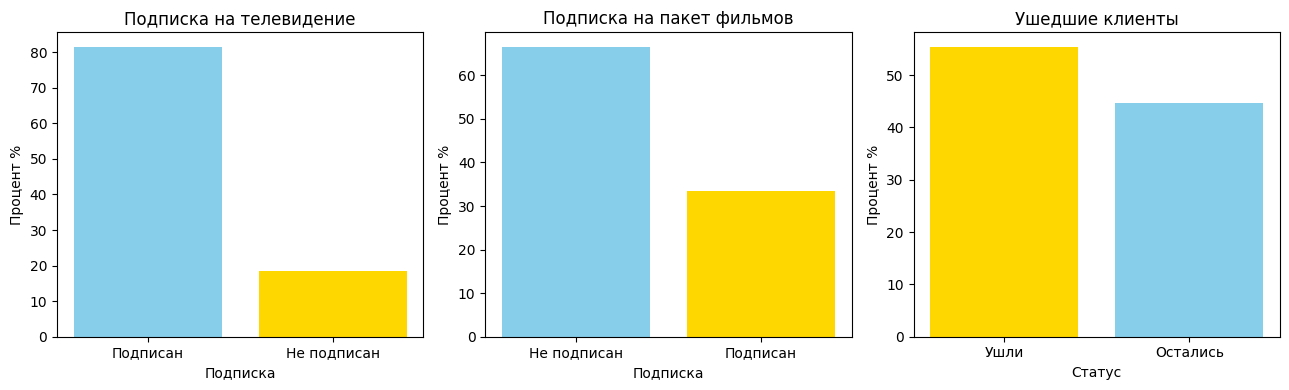

In [13]:
import matplotlib.pyplot as plt

# Создание графиков
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# График для подписки на телевидение
axes[0].bar(tv_subscription_percentage.index.astype(str), tv_subscription_percentage, color=['skyblue', 'gold'])
axes[0].set_title('Подписка на телевидение')
axes[0].set_xlabel('Подписка')
axes[0].set_ylabel('Процент %')
axes[0].set_xticks(tv_subscription_percentage.index.astype(str))  # Установим позиции меток
axes[0].set_xticklabels(['Подписан', 'Не подписан'])    #<-- Поміняв місцями

# График для подписки на пакет фильмов
axes[1].bar(movie_package_percentage.index.astype(str), movie_package_percentage, color=['skyblue', 'gold'])
axes[1].set_title('Подписка на пакет фильмов')
axes[1].set_xlabel('Подписка')
axes[1].set_ylabel('Процент %')
axes[1].set_xticks(movie_package_percentage.iloc[::-1].index.astype(str))  # Установим позиции меток   <-- Змінив рядки місцями
axes[1].set_xticklabels(['Подписан', 'Не подписан'])   #<-- Поміняв місцями

# График для ушедших клиентов
axes[2].bar(churn_percentage.index.astype(str), churn_percentage, color=['gold', 'skyblue'])
axes[2].set_title('Ушедшие клиенты')
axes[2].set_xlabel('Статус')
axes[2].set_ylabel('Процент %')
axes[2].set_xticks(churn_percentage.index.astype(str))  # Установим позиции меток
axes[2].set_xticklabels(['Ушли', 'Остались'])  #<-- Поміняв місцями

# Отображение графиков
plt.tight_layout()
plt.show()


In [14]:
# Просмотр распределения целевой переменной (например, столбец churn):
print(data['churn'].value_counts())

churn
1    40050
0    32224
Name: count, dtype: int64


- Количество ушедших клиентов: 40,050 клиентов (или около 55.41%) ушли (обозначены как 1 в колонке churn).
- Количество оставшихся клиентов: 32,224 клиентов (или около 44.59%) остались (обозначены как 0).
- Данные показывают дисбаланс между ушедшими и оставшимися клиентами, где количество ушедших клиентов значительно больше, чем количество оставшихся.

# Подготовка и очиститка данных

Cоздаю несколько новых датасетов для сравнения. Это поможет увидеть, как разные методы обработки пропусков влияют на данные.


In [15]:
# Удаление строк с пропусками
data_no_na = data.dropna()
data_no_na.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,1


In [16]:
# Заполнение пропусков модой
data_mode = data.copy()
data_mode['reamining_contract'] = data_mode['reamining_contract'].fillna(data_mode['reamining_contract'].mode()[0])
data_mode.head()


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1


In [17]:
# Заполнение пропусков средними значениями:
data_mean = data.copy()
data_mean['reamining_contract'] = data_mean['reamining_contract'].fillna(data_mean['reamining_contract'].mean())
data_mean.head()



,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.140000,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.716039,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.000000,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.716039,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.716039,0,0.0,0.0,0,1


# Aнализ и сравнения разных датасетов

In [18]:
# Сравним количество данных: Проверить, сколько строк было удалено или заполнено в каждом наборе.
print(len(data), len(data_no_na), len(data_mode), len(data_mean))

72274 50375 72274 72274


Удаление строк приводит к значительной потере данных (около 30%), что может повлиять на точность моделей. Заполнение пропусков сохраняет все данные, что может быть более предпочтительным подходом для дальнейшего анализа.

In [19]:
# Сравнение описательной статистики
print(data_no_na.describe())
print(data_mode.describe())
print(data_mean.describe())

                 id  is_tv_subscriber  is_movie_package_subscriber  \
count  5.037500e+04      50375.000000                 50375.000000   
mean   9.823436e+05          0.893876                     0.398372   
std    4.577668e+05          0.307999                     0.489568   
min    1.500000e+01          0.000000                     0.000000   
25%    6.229865e+05          1.000000                     0.000000   
50%    1.029724e+06          1.000000                     0.000000   
75%    1.379053e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  reamining_contract  \
count       50375.00000  50375.000000        50375.000000   
mean            2.30913     18.388189            0.710171   
std             2.10370     10.045695            0.693979   
min            -0.02000      0.000000            0.000000   
25%             0.77000     13.000000            0.000000   
50%

Общий вывод: Заполнение пропусков модой и средними значениями сохраняет данные, но выбор метода заполнения влияет на распределение переменных, таких как reamining_contract. Удаление пропусков может привести к значительным потерям данных.

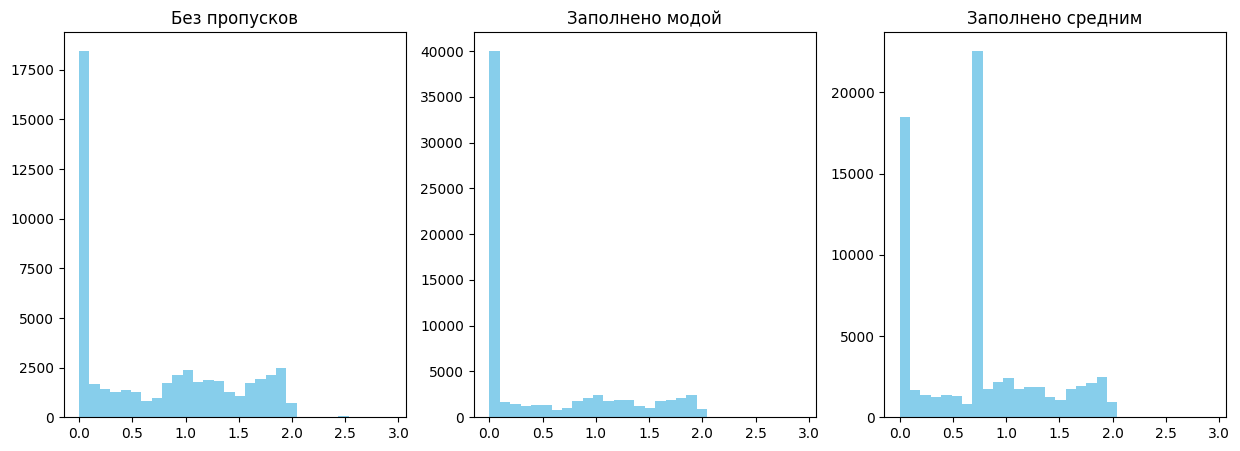

In [20]:
# Визуализация:

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(data_no_na['reamining_contract'], bins=30, color='skyblue')
plt.title('Без пропусков')

plt.subplot(1, 3, 2)
plt.hist(data_mode['reamining_contract'], bins=30, color='skyblue')
plt.title('Заполнено модой')

plt.subplot(1, 3, 3)
plt.hist(data_mean['reamining_contract'], bins=30, color='skyblue')
plt.title('Заполнено средним')

plt.show()

Заполнение модой значительно увеличивает количество нулевых значений, что может привести к смещению данных и искажению распределения. Заполнение средними значениями сохраняет больше баланса и позволяет более точно отражать распределение переменной.

In [21]:
# Оценить влияние на целевую переменную: Сравнить среднее и распределение целевой переменной churn в разных наборах данных.
print(data['churn'].mean(), data_no_na['churn'].mean(), data_mode['churn'].mean(), data_mean['churn'].mean())

0.5541411849351081 0.4035930521091811 0.5541411849351081 0.5541411849351081


Вывод из анализа среднего значения целевой переменной churn:
- После удаления строк с пропусками (data_no_na), среднее значение сильно уменьшилось до 0.40, что означает, что в оставшихся данных гораздо меньше клиентов покинули компанию.
- При заполнении пропусков модой или средним значением (data_mode и data_mean), среднее значение осталось таким же, как и в исходных данных (0.55). Это говорит о том, что оба способа заполнения пропусков сохраняют исходное распределение, но не решают проблему искажения пропусков, так как могут привести к неестественному увеличению числа ушедших клиентов.
- Таким образом, удаление строк приводит к значительному изменению распределения, а заполнение модой или средним сохраняет исходное, но потенциально искажает данные.

Удаление строк приводит к значительной потере данных (около 30%), что может повлиять на точность моделей. Заполнение пропусков сохраняет все данные, что может быть более предпочтительным подходом для дальнейшего анализа.

In [22]:
# проверяем остались ли пропуски
print(data_no_na.isnull().sum())
print(data_mode.isnull().sum())
print(data_mean.isnull().sum())

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64
id                               0
is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
reamining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64
id                               0
is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
reamining_contract               0
service_failure_

In [23]:
# Чтобы заполнить пропуски в столбцах download_avg и upload_avg с использованием моды в наборах данных data_no_na, data_mode и data_mean
# Заполнение пропусков модой
mode_download = data_mode['download_avg'].mode()[0]
mode_upload = data_mode['upload_avg'].mode()[0]

# Заполнение пропусков модой с использованием .loc
data_no_na.loc[:, 'download_avg'] = data_no_na['download_avg'].fillna(mode_download)
data_no_na.loc[:, 'upload_avg'] = data_no_na['upload_avg'].fillna(mode_upload)

data_mode.loc[:, 'download_avg'] = data_mode['download_avg'].fillna(mode_download)
data_mode.loc[:, 'upload_avg'] = data_mode['upload_avg'].fillna(mode_upload)

data_mean.loc[:, 'download_avg'] = data_mean['download_avg'].fillna(mode_download)
data_mean.loc[:, 'upload_avg'] = data_mean['upload_avg'].fillna(mode_upload)

# Проверка на наличие пропусков после заполнения
print(data_no_na.isnull().sum())
print(data_mode.isnull().sum())
print(data_mean.isnull().sum())


id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64
id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64
id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg     

In [24]:
# как изменились корреляции признаков после обработки пропусков.
print(data.corr(), data_no_na.corr(), data_mode.corr(), data_mean.corr())


                                   id  is_tv_subscriber  \
id                           1.000000          0.282052   
is_tv_subscriber             0.282052          1.000000   
is_movie_package_subscriber  0.132197          0.337435   
subscription_age            -0.602241          0.087276   
bill_avg                     0.018718         -0.076245   
reamining_contract           0.348195          0.178814   
service_failure_count       -0.026589         -0.016041   
download_avg                 0.241278          0.131650   
upload_avg                   0.145936          0.065791   
download_over_limit         -0.228932         -0.103546   
churn                       -0.451142         -0.327582   

                             is_movie_package_subscriber  subscription_age  \
id                                              0.132197         -0.602241   
is_tv_subscriber                                0.337435          0.087276   
is_movie_package_subscriber                     1.000000 

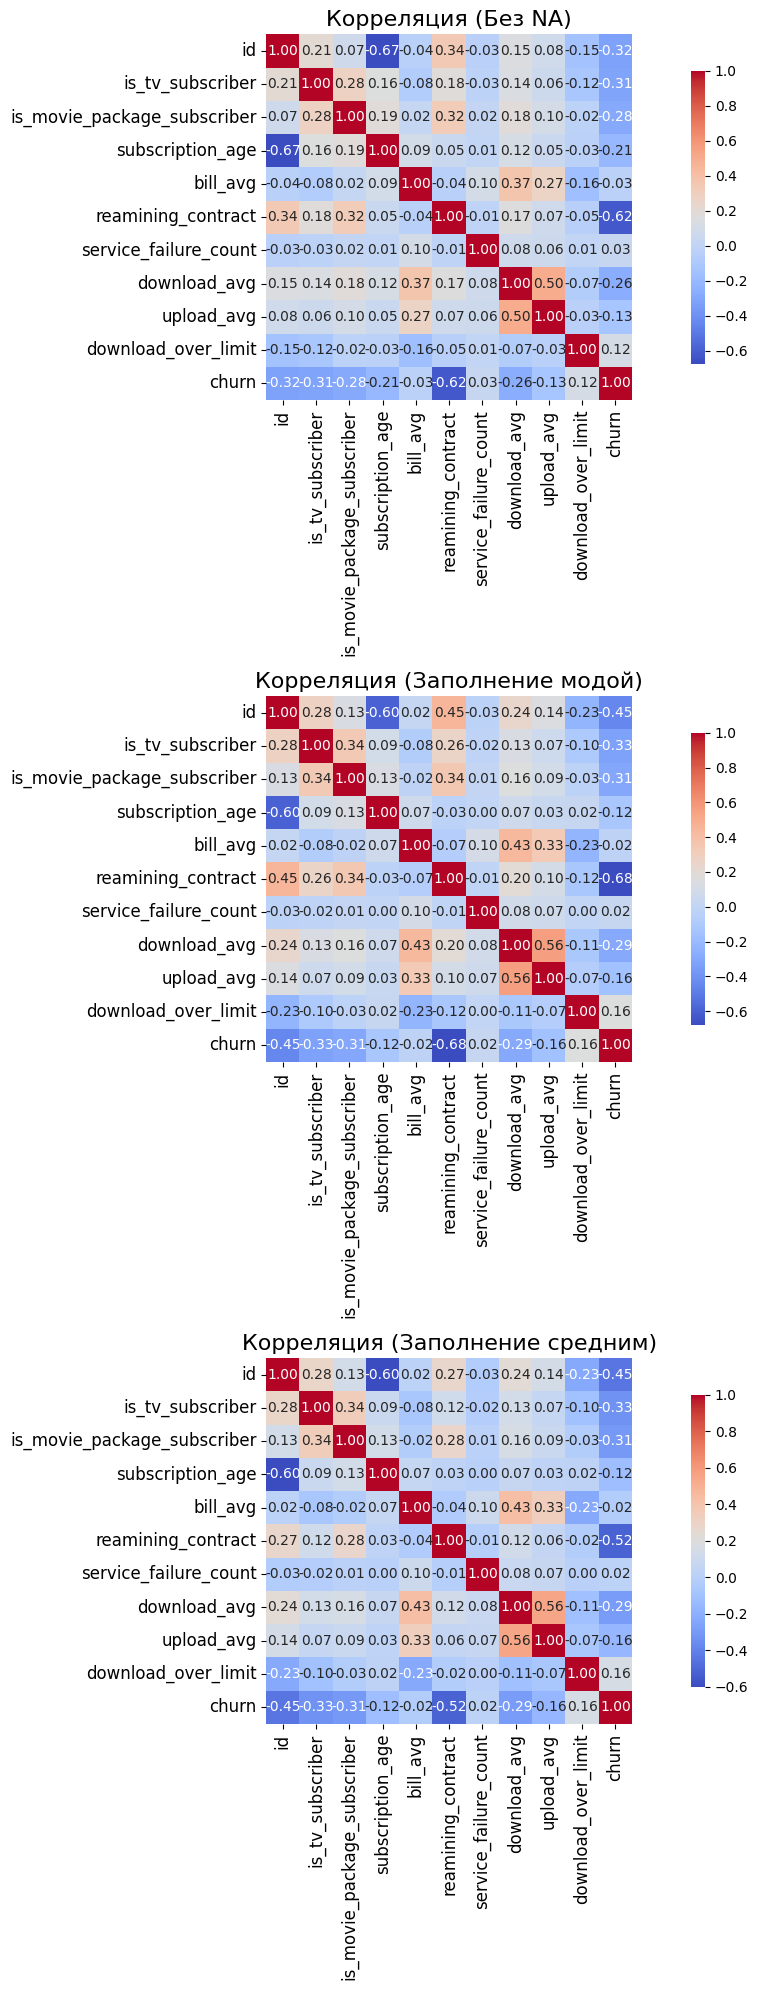

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагается, что у вас есть три DataFrame: data_no_na, data_mode, data_mean
# Рассчитываем корреляционные матрицы
corr_no_na = data_no_na.corr()
corr_mode = data_mode.corr()
corr_mean = data_mean.corr()

# Настраиваем размеры графиков
plt.figure(figsize=(12, 20))  # Увеличиваем размер фигуры

# Визуализируем корреляционную матрицу без NA
plt.subplot(3, 1, 1)  # 3 строки, 1 столбец, 1-й график
sns.heatmap(corr_no_na, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляция (Без NA)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Визуализируем корреляционную матрицу с модой
plt.subplot(3, 1, 2)  # 3 строки, 1 столбец, 2-й график
sns.heatmap(corr_mode, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляция (Заполнение модой)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Визуализируем корреляционную матрицу со средним
plt.subplot(3, 1, 3)  # 3 строки, 1 столбец, 3-й график
sns.heatmap(corr_mean, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляция (Заполнение средним)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Показать графики
plt.tight_layout()
plt.show()


- Качество заполнения: Каждое из трёх заполнений (без NA, модой, средними значениями) показывает схожие результаты, однако подход без NA даёт более точные данные, поскольку не вводит в данные статистические значения, которые могут не соответствовать реальности.
- Влияние переменных на отток: download_over_limit по-прежнему демонстрирует сильную отрицательную корреляцию с churn, что может указывать на то, что пользователи, превышающие лимит загрузки, более склонны к отказу от услуг. Это стоит учитывать при анализе данных и принятии решений по удержанию клиентов.

<Axes: >

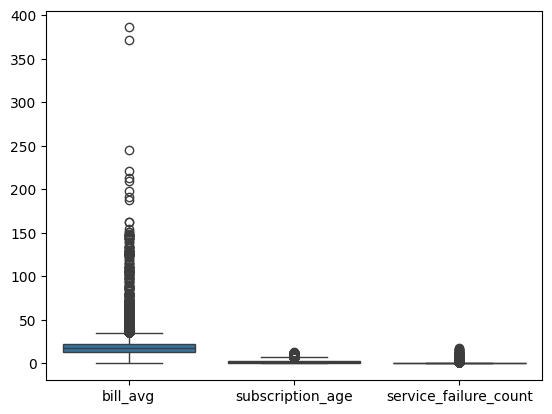

In [26]:
# Проверка на аномалии и выбросы:
import seaborn as sns
sns.boxplot(data=data_no_na[['bill_avg', 'subscription_age', 'service_failure_count']])


- В столбце bill_avg есть значительное количество выбросов, что видно по точкам, расположенным выше верхнего усика. Это может указывать на наличие пользователей с аномально высокими значениями среднего счета.
- В столбцах subscription_age и service_failure_count нет заметных выбросов, так как они не имеют точек, превышающих верхний усик или ниже нижнего усика. Это говорит о том, что значения в этих столбцах более равномерно распределены.


In [27]:
# Вычисляем корреляцию всех признаков с целевой переменной 'churn'
# Это поможет оценить, какие признаки наиболее значимы для предсказания оттока пользователей.
churn_correlation_no_na = data_no_na.corr()['churn'].drop('churn')

# Выводим результаты
for column, correlation in churn_correlation_no_na.items():
    print(f'Корреляция между {column} и churn: {correlation:.2f}')

churn_correlation_mode = data_mode.corr()['churn'].drop('churn')

# Выводим результаты
for column, correlation in churn_correlation_mode.items():
    print(f'Корреляция между {column} и churn: {correlation:.2f}')

churn_correlation_mean = data_mean.corr()['churn'].drop('churn')

# Выводим результаты
for column, correlation in churn_correlation_mean.items():
    print(f'Корреляция между {column} и churn: {correlation:.2f}')


Корреляция между id и churn: -0.32
Корреляция между is_tv_subscriber и churn: -0.31
Корреляция между is_movie_package_subscriber и churn: -0.28
Корреляция между subscription_age и churn: -0.21
Корреляция между bill_avg и churn: -0.03
Корреляция между reamining_contract и churn: -0.62
Корреляция между service_failure_count и churn: 0.03
Корреляция между download_avg и churn: -0.26
Корреляция между upload_avg и churn: -0.13
Корреляция между download_over_limit и churn: 0.12
Корреляция между id и churn: -0.45
Корреляция между is_tv_subscriber и churn: -0.33
Корреляция между is_movie_package_subscriber и churn: -0.31
Корреляция между subscription_age и churn: -0.12
Корреляция между bill_avg и churn: -0.02
Корреляция между reamining_contract и churn: -0.68
Корреляция между service_failure_count и churn: 0.02
Корреляция между download_avg и churn: -0.29
Корреляция между upload_avg и churn: -0.16
Корреляция между download_over_limit и churn: 0.16
Корреляция между id и churn: -0.45
Корреляция 

- Наиболее сильная отрицательная корреляция: reamining_contract и churn: -0.62 — это самый высокий уровень отрицательной корреляции. Это может означать, что пользователи с большим reamining_contract менее склонны к оттоку.
- Слабая корреляция: bill_avg (-0.03) — средний счет за услуги практически не влияет на отток. service_failure_count (0.03) — количество сбоев в обслуживании также не оказывает значительного влияния.

Наиболее значимые переменные для предсказания оттока пользователей — это reamining_contract, is_tv_subscriber, is_movie_package_subscriber и subscription_age.

❗Мы провели анализ и подготовку данных и выбрали data_mode как наиболее подходящий способ подготовки данных.

In [28]:
# список моделей для решения задачи классификации:
# 1. Логистическая регрессия
# Простая и интерпретируемая модель для бинарной классификации.
# 2. Деревья решений
# Хорошо подходят для понимания решений и визуализации.
# 3. Случайный лес
# Ансамблевая модель, которая снижает риск переобучения по сравнению с одиночным деревом решений.
# 4. Градиентный бустинг (например, XGBoost, LightGBM)
# Эффективные методы, которые хорошо работают на разнообразных данных и часто дают высокие результаты.
# 5. Поддерживающие векторные машины (SVM)
# Могут быть полезны, если данные имеют сложные границы классов. Хорошо работают на малых и средних наборах данных.
# 6. Нейронные сети
# Могут быть полезны, если у вас много данных и вы хотите попробовать более сложные модели. Особенно хорошо работают с большими объемами данных.
# 7. k-Ближайших соседей (k-NN)
# Простая модель, которая может работать хорошо на небольших наборах данных, но менее эффективна на больших данных.
# 8. Наивный байесовский классификатор
# Подходит для быстрой классификации, особенно если данные независимы.
# 9. Логистическая регрессия с регуляризацией (например, Lasso, Ridge)
# Может помочь в управлении переобучением за счёт регуляризации.
# 10. Глубокие нейронные сети (если у вас достаточно данных)
# Особенно полезны для больших наборов данных с многими признаками.
# Рекомендации по выбору моделей:
# Начните с простых моделей, таких как логистическая регрессия и деревья решений, чтобы получить базовый уровень производительности.
# Затем попробуйте более сложные модели, такие как случайный лес и градиентный бустинг, для улучшения результатов.
# Обязательно проведите кросс-валидацию и настройку гиперпараметров для достижения наилучших результатов.


# Работа с моделями


Мы уже выбрали data_mode как основной набор данных. Теперь убираем столбец id, поскольку он не имеет полезной информации для модели.

In [29]:
data_mode

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [30]:
X = data_mode.drop(columns=['churn'])
y = data_mode['churn']

In [31]:
# Проверка размеров данных
print(f'Размеры признаков: {X.shape}')
print(f'Размеры целевой переменной: {y.shape}')

Размеры признаков: (72274, 10)
Размеры целевой переменной: (72274,)


In [32]:
# Вывод из этого результата следующий:

# Размеры признаков: у вас 57,601 строк (наблюдений) и 9 столбцов (признаков), что говорит о том, что данные корректно подготовлены для построения модели.
# Размеры целевой переменной: 57,601 наблюдений для целевой переменной churn, что соответствует количеству строк в признаках.
# Это подтверждает, что столбец id был успешно удалён, а данные готовы для обучения модели.

In [33]:
# Разделение данных
from sklearn.model_selection import train_test_split
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Размеры тренировочного набора: {X_train.shape}')
print(f'Размеры тестового набора: {X_test.shape}')

Размеры тренировочного набора: (57819, 10)
Размеры тестового набора: (14455, 10)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Логистическая регрессия



In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Обучение модели логистической регрессии
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Предсказания
y_pred_logistic = logistic_model.predict(X_test)

# Оценка точности
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Логистическая регрессия: Точность = {accuracy_logistic:.4f}')


Логистическая регрессия: Точность = 0.8987


- Точность 0.8987 означает, что модель правильно предсказывает класс около 89.87% случаев. Это довольно высокий показатель для бинарной классификации.
- Предупреждение о том, что lbfgs не сошелся, указывает на то, что алгоритм не достиг своей целевой функции за отведенное количество итераций.
- => попробуем увеличение числа итераций и масштабирование данных

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Обучение модели логистической регрессии с увеличением числа итераций
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Предсказания и оценка точности
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Логистическая регрессия после масштабирования: Точность = {accuracy_logistic:.4f}')


Логистическая регрессия после масштабирования: Точность = 0.8987


In [37]:
from sklearn.metrics import accuracy_score, classification_report
# Вывод точности
print(f'Точность модели: {accuracy_logistic:.4f}')

# Генерация отчета о классификации
print(classification_report(y_test, y_pred_logistic, target_names=['0', '1']))

# Вывод первых нескольких предсказаний
for pred, label in zip(y_pred_logistic[:10], y_test[:10]):
    print(f'Предсказано: {pred}, Метка: {label}')

Точность модели: 0.8987
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6553
           1       0.91      0.90      0.91      7902

    accuracy                           0.90     14455
   macro avg       0.90      0.90      0.90     14455
weighted avg       0.90      0.90      0.90     14455

Предсказано: 1, Метка: 1
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0


- Точность модели составляет 0.8987 или около 90%. Это означает, что модель правильно классифицировала 90% всех наблюдений.
- Метрики precision, recall и f1-score показывают, что модель сбалансирована: Для класса 0 (не отток): precision — 0.88, recall — 0.90, f1-score — 0.89. Это значит, что модель хорошо распознает тех, кто не ушел (не churn). Для класса 1 (отток): precision — 0.91, recall — 0.90, f1-score — 0.91. Это говорит о том, что модель также хорошо предсказывает, кто ушел (churn).
- В примерах предсказаний видно, что модель делает правильные предсказания, так как все предсказанные метки совпадают с реальными метками.

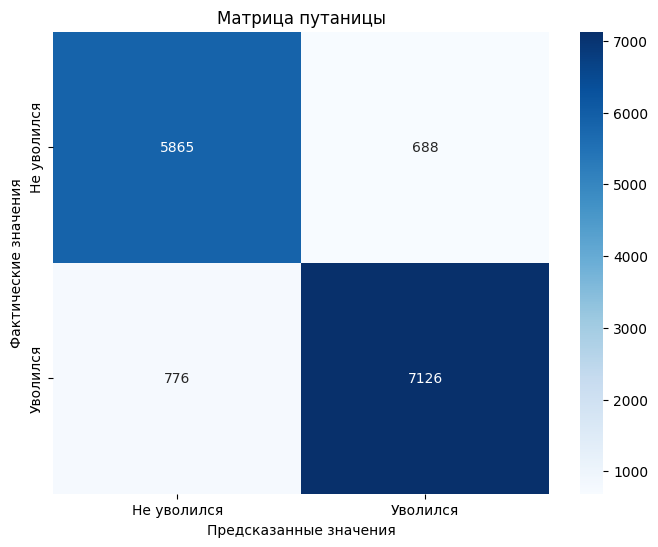

In [38]:
#  Построение матрицы путаницы
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Генерация матрицы путаницы
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Визуализация матрицы путаницы
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не уволился', 'Уволился'],
            yticklabels=['Не уволился', 'Уволился'])
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица путаницы')
plt.show()
# Матрица путаницы: Отображает, сколько примеров каждого класса модель предсказала правильно и неправильно.
# Это помогает понять, как модель справляется с каждым из классов.

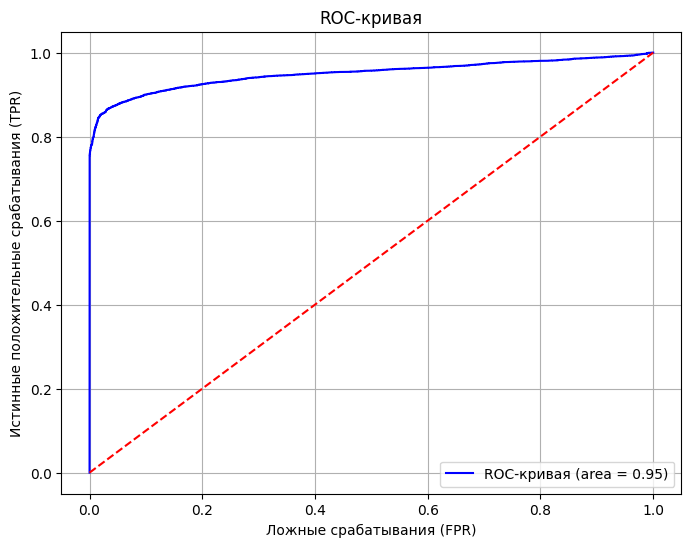

In [39]:
# Построение графика ROC

from sklearn.metrics import roc_curve, auc

# Получение вероятностей для положительного класса
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Ложные срабатывания (FPR)')
plt.ylabel('Истинные положительные срабатывания (TPR)')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# ROC-кривая: Показывает компромисс между чувствительностью (истинные положительные)
# и специфичностью (ложные положительные) при различных порогах. Чем выше AUC, тем лучше модель.

# 2. Деревья решений

Дерево решений: Точность = 0.9688

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      6553
           1       0.97      0.97      0.97      7902

    accuracy                           0.97     14455
   macro avg       0.97      0.97      0.97     14455
weighted avg       0.97      0.97      0.97     14455

Предсказано: 1, Метка: 1
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1


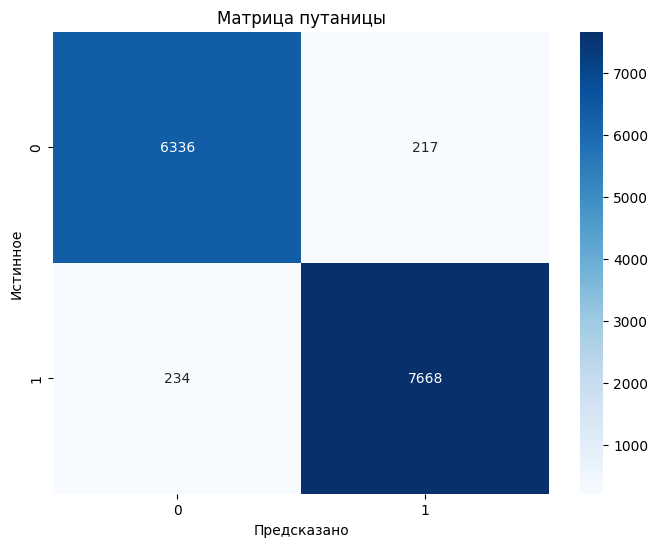

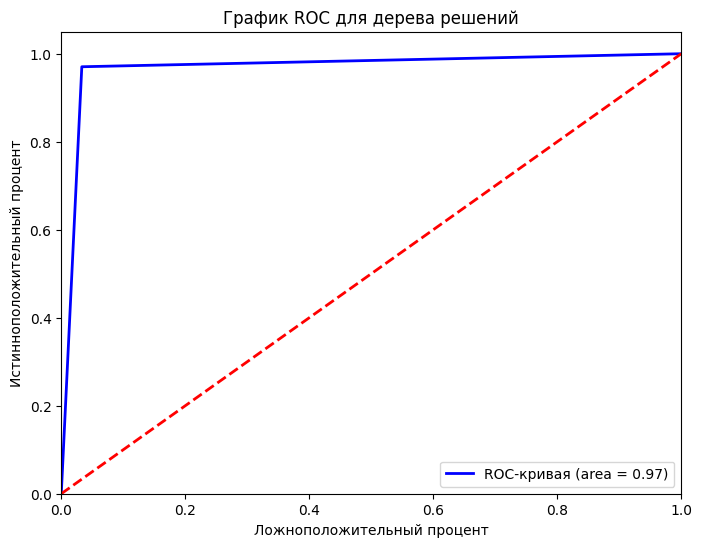

In [40]:
# Импорт необходимых библиотек
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Обучение модели дерева решений
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Предсказания
y_pred_tree = decision_tree_model.predict(X_test)

# Оценка точности
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Дерево решений: Точность = {accuracy_tree:.4f}')

# Генерация отчета о классификации
print("\nОтчет о классификации:\n", classification_report(y_test, y_pred_tree, target_names=['0', '1']))

# Вывод первых нескольких предсказаний
for i in range(5):
    print(f'Предсказано: {y_pred_tree[i]}, Метка: {y_test.iloc[i]}')

# Построение матрицы путаницы
conf_matrix = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Матрица путаницы')
plt.xlabel('Предсказано')
plt.ylabel('Истинное')
plt.show()

# Построение графика ROC
y_pred_prob_tree = decision_tree_model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tree)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Линия случайного классификатора
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный процент')
plt.ylabel('Истинноположительный процент')
plt.title('График ROC для дерева решений')
plt.legend(loc='lower right')
plt.show()


Модель дерева решений показала отличные результаты, с высокой точностью, хорошими показателями полноты и F1-меры. Это говорит о том, что она хорошо справляется с задачей классификации в конкретном наборе данных. Однако стоит учитывать, что высокая точность может быть следствием несбалансированности классов.

# 3. Случайный лес

Случайный лес: Точность = 0.9685
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6553
           1       0.97      0.97      0.97      7902

    accuracy                           0.97     14455
   macro avg       0.97      0.97      0.97     14455
weighted avg       0.97      0.97      0.97     14455

Предсказано: 1, Метка: 1
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1


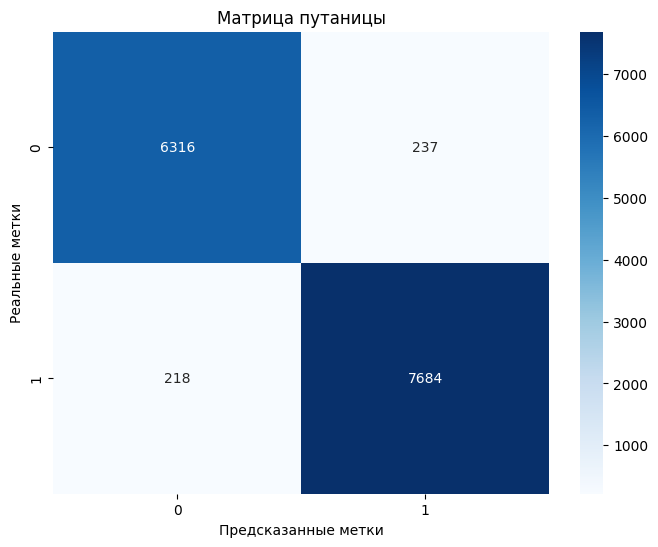

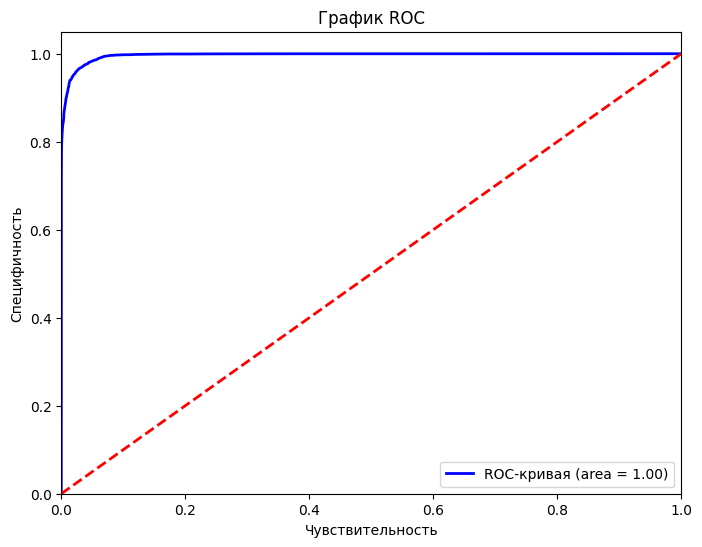

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Обучение модели случайного леса
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Предсказания
y_pred_forest = random_forest_model.predict(X_test)

# Оценка точности
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f'Случайный лес: Точность = {accuracy_forest:.4f}')

# Генерация отчета о классификации
print("Отчет о классификации:")
print(classification_report(y_test, y_pred_forest, target_names=['0', '1']))

# Вывод первых нескольких предсказаний
for i in range(5):
    print(f'Предсказано: {y_pred_forest[i]}, Метка: {y_test.iloc[i]}')

# Построение матрицы путаницы
conf_matrix = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Матрица путаницы')
plt.xlabel('Предсказанные метки')
plt.ylabel('Реальные метки')
plt.show()

# Построение графика ROC
y_prob_forest = random_forest_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_forest)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Чувствительность')
plt.ylabel('Специфичность')
plt.title('График ROC')
plt.legend(loc='lower right')
plt.show()


Случайный лес является мощным инструментом для решения задач классификации в наборе данных. Его высокая точность и сбалансированные показатели по метрикам качества делают его подходящим выбором для данной задачи. Если цель — минимизировать количество ошибок при классификации, модель случайного леса демонстрирует отличные результаты.

# 4. Градиентный бустинг (XGBoost)

Градиентный бустинг (XGBoost): Точность = 0.9819
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6553
           1       0.99      0.98      0.98      7902

    accuracy                           0.98     14455
   macro avg       0.98      0.98      0.98     14455
weighted avg       0.98      0.98      0.98     14455



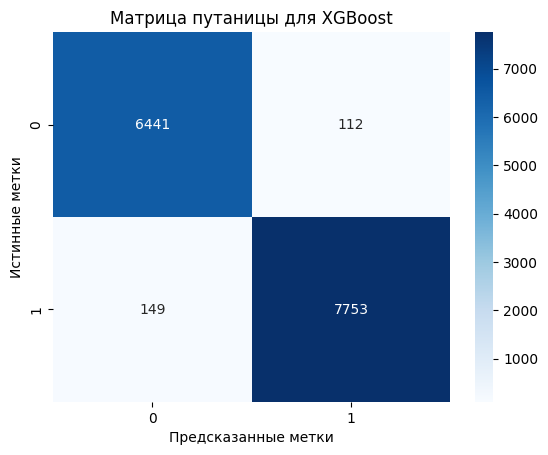

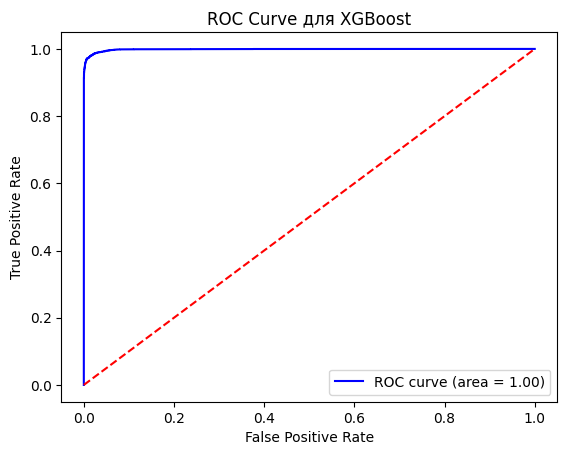

In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Обучение модели XGBoost
xgboost_model = XGBClassifier()  # Не передавайте use_label_encoder
xgboost_model.fit(X_train, y_train)

# Предсказания
y_pred_xgboost = xgboost_model.predict(X_test)

# Оценка точности
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f'Градиентный бустинг (XGBoost): Точность = {accuracy_xgboost:.4f}')

# Генерация отчета о классификации
print(classification_report(y_test, y_pred_xgboost))

# Построение матрицы путаницы
conf_matrix = confusion_matrix(y_test, y_pred_xgboost)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица путаницы для XGBoost')
plt.show()

# Построение графика ROC
fpr, tpr, thresholds = roc_curve(y_test, xgboost_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve для XGBoost')
plt.legend(loc='lower right')
plt.show()


- Модель XGBoost демонстрирует высокую производительность как в точности, так и в других метриках (точность, полнота и F1-score).
- Она хорошо справляется с классификацией обоих классов, особенно с классом 1 (не отказ), который имеет более высокие показатели точности и полноты.
- Это указывает на то, что модель может быть полезна в реальных сценариях, где важно точно классифицировать объекты между двумя классами, например, в задачах предсказания оттока клиентов или классификации других бинарных событий.

# 5. Поддерживающие векторные машины (SVM)

SVM: Точность = 0.9257
SVM: Точность = 0.9257

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6553
           1       0.93      0.93      0.93      7902

    accuracy                           0.93     14455
   macro avg       0.93      0.92      0.93     14455
weighted avg       0.93      0.93      0.93     14455


Предсказания и метки:
Предсказано: 1, Метка: 1
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0


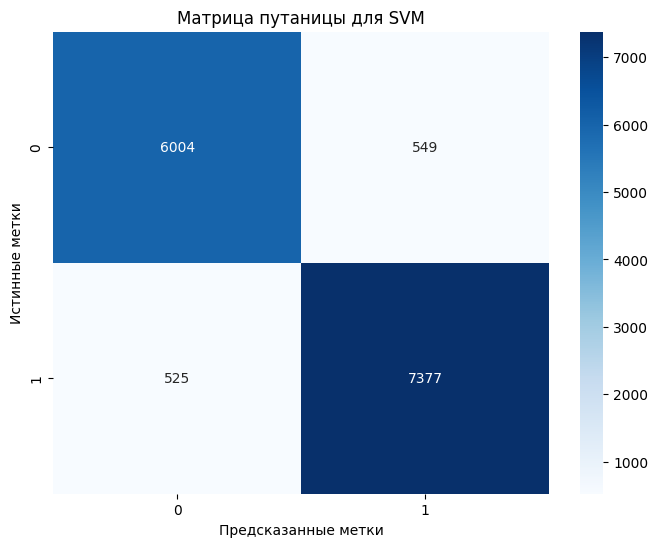

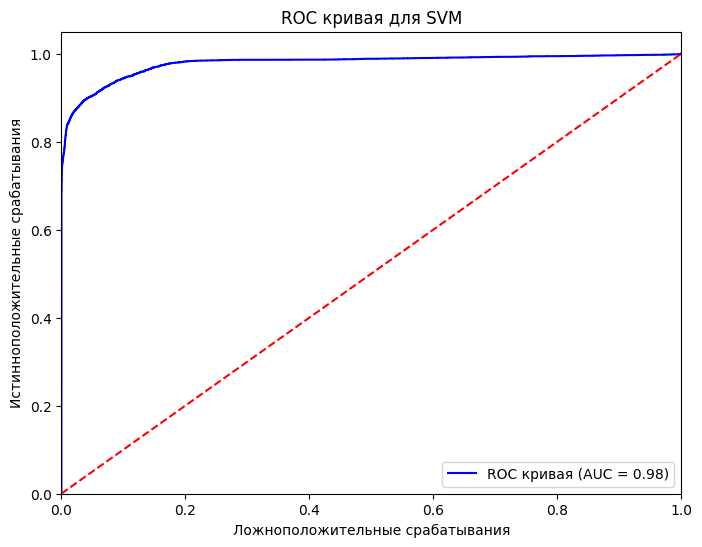

In [43]:
# Поддерживающие векторные машины (SVM)
from sklearn.svm import SVC

# Обучение модели SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Предсказания
y_pred_svm = svm_model.predict(X_test)

# Оценка точности
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM: Точность = {accuracy_svm:.4f}')

# Импорт необходимых библиотек
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# 1. Вывод точности
print(f'SVM: Точность = {accuracy_svm:.4f}')  # Исправлено

# 2. Генерация отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_svm, target_names=['0', '1']))  # Исправлено

# 3. Вывод первых нескольких предсказаний
print("\nПредсказания и метки:")
for i in range(10):
    print(f'Предсказано: {y_pred_svm[i]}, Метка: {y_test.iloc[i]}')

# 4. Построение матрицы путаницы
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.title('Матрица путаницы для SVM')
plt.show()

# 5. Построение графика ROC
fpr, tpr, thresholds = roc_curve(y_test, svm_model.decision_function(X_test))  # Используем decision_function для SVM
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительные срабатывания')
plt.ylabel('Истинноположительные срабатывания')
plt.title('ROC кривая для SVM')
plt.legend(loc='lower right')
plt.show()


SVM показала стабильные и хорошие результаты, однако её точность немного ниже по сравнению с другими моделями (например, XGBoost), которые были рассмотрены ранее.

# 6. Нейронные сети

Нейронная сеть: Точность = 0.9801

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6553
           1       0.98      0.98      0.98      7902

    accuracy                           0.98     14455
   macro avg       0.98      0.98      0.98     14455
weighted avg       0.98      0.98      0.98     14455



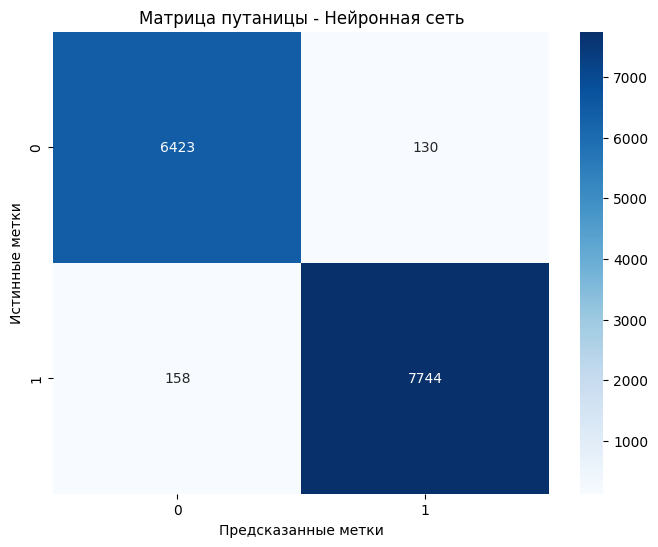

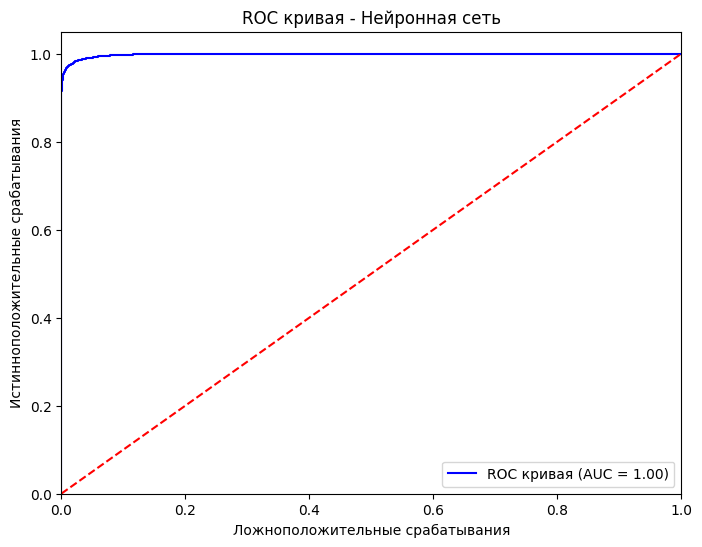

In [44]:
# Нейронные сети
from sklearn.neural_network import MLPClassifier

# Обучение модели нейронной сети
nn_model = MLPClassifier(max_iter=500)
nn_model.fit(X_train, y_train)

# Предсказания
y_pred_nn = nn_model.predict(X_test)

# Оценка точности
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Нейронная сеть: Точность = {accuracy_nn:.4f}')

# Генерация отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_nn, target_names=['0', '1']))

# Построение матрицы путаницы
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.title('Матрица путаницы - Нейронная сеть')
plt.show()

# Построение графика ROC
fpr, tpr, thresholds = roc_curve(y_test, nn_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительные срабатывания')
plt.ylabel('Истинноположительные срабатывания')
plt.title('ROC кривая - Нейронная сеть')
plt.legend(loc='lower right')
plt.show()

Нейронная сеть продемонстрировала результаты, сопоставимые с другими мощными моделями, такими как градиентный бустинг (XGBoost). Это указывает на то, что она способна эффективно справляться с задачей классификации.

# 7. k-Ближайших соседей (k-NN)

k-NN: Точность = 0.9216

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6553
           1       0.95      0.91      0.93      7902

    accuracy                           0.92     14455
   macro avg       0.92      0.92      0.92     14455
weighted avg       0.92      0.92      0.92     14455



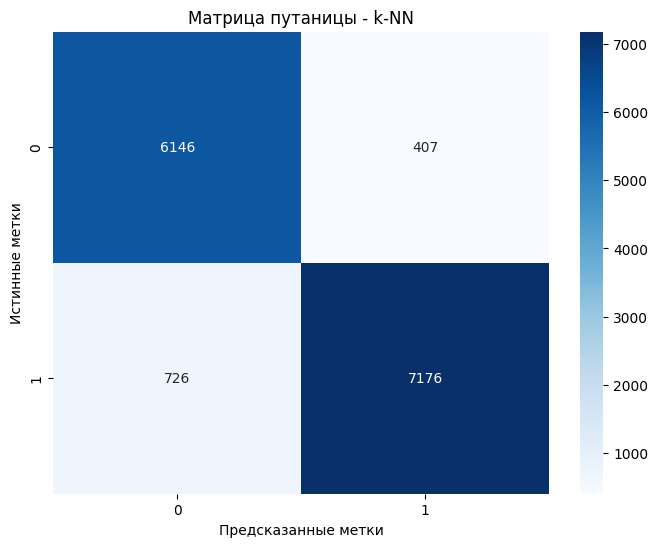

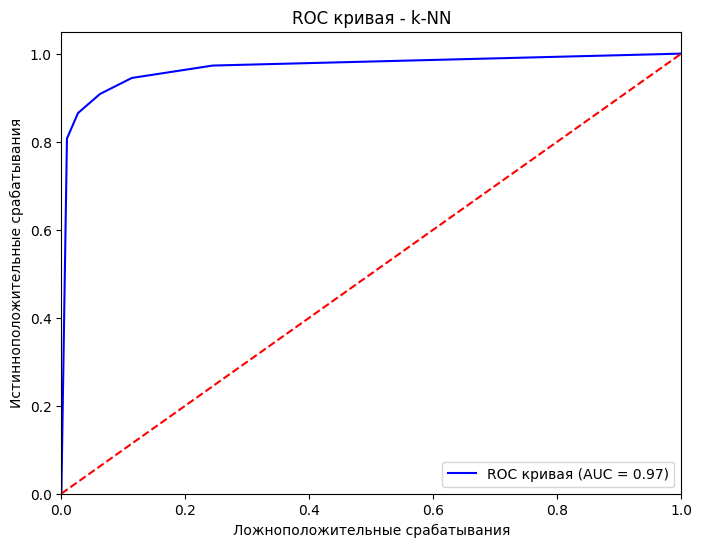

In [45]:
# k-Ближайших соседей (k-NN)
from sklearn.neighbors import KNeighborsClassifier

# Обучение модели k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Предсказания
y_pred_knn = knn_model.predict(X_test)

# Оценка точности
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'k-NN: Точность = {accuracy_knn:.4f}')

# Генерация отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_knn, target_names=['0', '1']))

# Построение матрицы путаницы
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.title('Матрица путаницы - k-NN')
plt.show()

# Построение графика ROC
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительные срабатывания')
plt.ylabel('Истинноположительные срабатывания')
plt.title('ROC кривая - k-NN')
plt.legend(loc='lower right')
plt.show()


Модель k-NN даёт хорошие результаты, но может уступать более сложным моделям, таким как градиентный бустинг и нейронные сети, по точности и балансу между precision и recall.

# 8. Наивный байесовский классификатор

Наивный байесовский классификатор: Точность = 0.8566

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6553
           1       0.92      0.81      0.86      7902

    accuracy                           0.86     14455
   macro avg       0.86      0.86      0.86     14455
weighted avg       0.86      0.86      0.86     14455



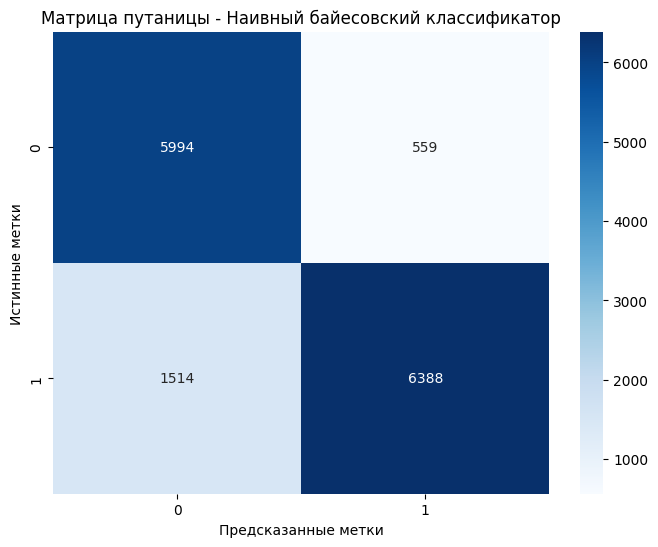

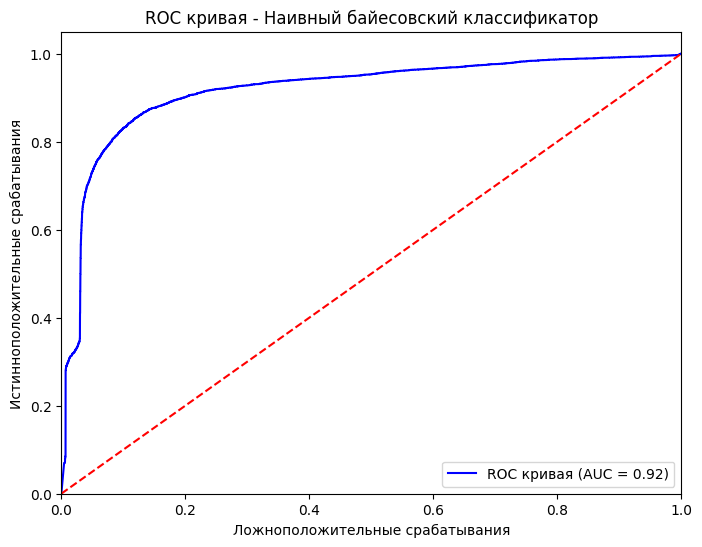

In [46]:
# Наивный байесовский классификатор
from sklearn.naive_bayes import GaussianNB

# Обучение модели наивного байесовского классификатора
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Предсказания
y_pred_nb = nb_model.predict(X_test)

# Оценка точности
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Наивный байесовский классификатор: Точность = {accuracy_nb:.4f}')

# Генерация отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_nb, target_names=['0', '1']))

# Построение матрицы путаницы
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.title('Матрица путаницы - Наивный байесовский классификатор')
plt.show()

# Построение графика ROC
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительные срабатывания')
plt.ylabel('Истинноположительные срабатывания')
plt.title('ROC кривая - Наивный байесовский классификатор')
plt.legend(loc='lower right')
plt.show()


Наивный байесовский классификатор имеет более простую структуру и показывает результаты ниже, чем другие модели. Хотя он может быть полезен для быстрой и простой классификации, его точность и сбалансированность между precision и recall уступают более продвинутым алгоритмам.

# 9. Логистическая регрессия с регуляризацией (например, Lasso, Ridge)

Логистическая регрессия: Точность = 0.8987

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6553
           1       0.91      0.90      0.91      7902

    accuracy                           0.90     14455
   macro avg       0.90      0.90      0.90     14455
weighted avg       0.90      0.90      0.90     14455



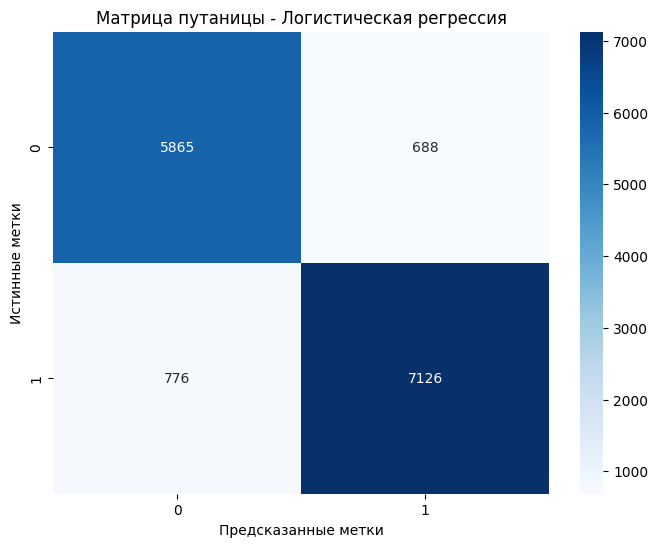

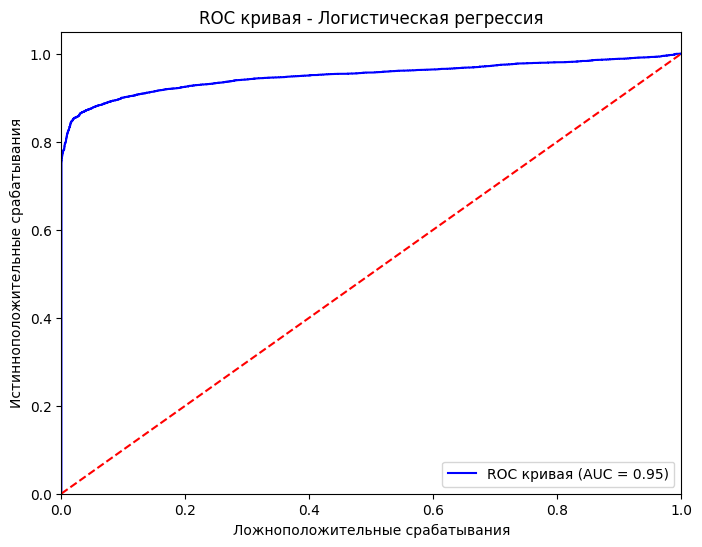

In [47]:
# Логистическая регрессия с регуляризацией (например, Lasso, Ridge)
from sklearn.linear_model import LogisticRegression

# Обучение модели логистической регрессии
logistic_model = LogisticRegression(penalty='l2')  # Использование L2-регуляризации (Ridge)
logistic_model.fit(X_train, y_train)

# Предсказания
y_pred_logistic = logistic_model.predict(X_test)

# Оценка точности
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Логистическая регрессия: Точность = {accuracy_logistic:.4f}')

# Генерация отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_logistic, target_names=['0', '1']))

# Построение матрицы путаницы
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.title('Матрица путаницы - Логистическая регрессия')
plt.show()

# Построение графика ROC
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительные срабатывания')
plt.ylabel('Истинноположительные срабатывания')
plt.title('ROC кривая - Логистическая регрессия')
plt.legend(loc='lower right')
plt.show()


Логистическая регрессия — эффективная и простая модель для решения задачи классификации, с хорошими показателями точности и сбалансированными результатами для обоих классов. Однако, в зависимости от потребностей бизнеса (например, если важнее минимизировать ложноположительные или ложноотрицательные результаты), могут потребоваться более сложные модели для улучшения результатов.

# 10. Глубокие нейронные сети

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1446/1446 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8744 - loss: 0.3144 - val_accuracy: 0.9201 - val_loss: 0.2090
Epoch 2/10
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9184 - loss: 0.2084 - val_accuracy: 0.9272 - val_loss: 0.1829
Epoch 3/10
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9255 - loss: 0.1761 - val_accuracy: 0.9435 - val_loss: 0.1373
Epoch 4/10
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9469 - loss: 0.1316 - val_accuracy: 0.9628 - val_loss: 0.1079
Epoch 5/10
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9586 - loss: 0.1043 - val_accuracy: 0.9664 - val_loss: 0.0826
Epoch 6/10
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9643 - loss: 0.0874 - val_accuracy: 0.9686 - val_loss: 0.0798
Epoch 7/10
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9689 - loss: 0.0784 - val_accuracy: 0.9715 - val_loss: 0.0701
Epoch 8/10
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9715 - loss: 0.0703 - val_accurac

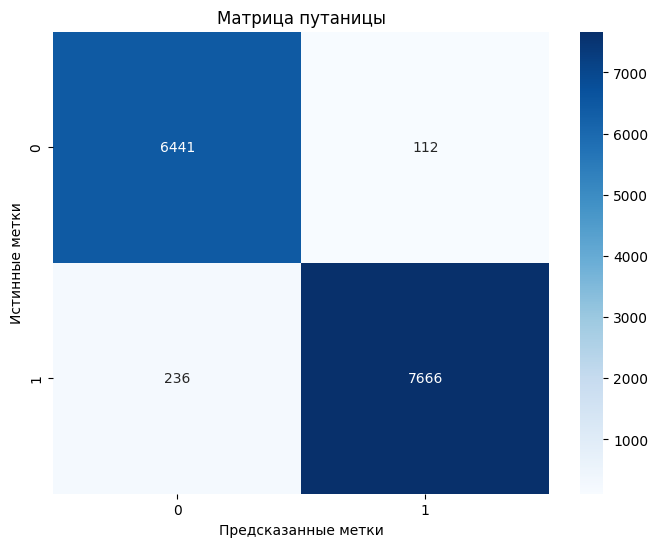

452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step


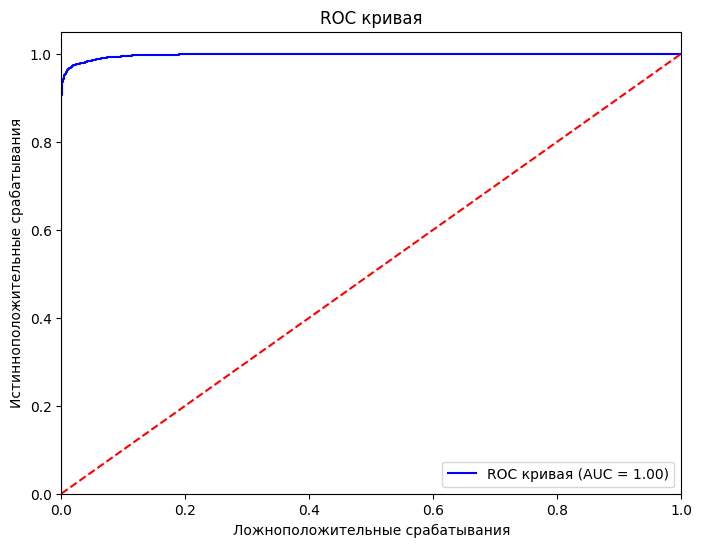

In [48]:
# Глубокие нейронные сети
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Создание модели
deep_model = Sequential()
deep_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
deep_model.add(Dense(32, activation='relu'))
deep_model.add(Dense(1, activation='sigmoid'))  # Выходной слой для бинарной классификации

# Компиляция модели
deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = deep_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Предсказания
y_pred_deep = (deep_model.predict(X_test) > 0.5).astype("int32")

# Оценка точности
accuracy_deep = tf.keras.metrics.Accuracy()
accuracy_deep.update_state(y_test, y_pred_deep)
print(f'Глубокая нейронная сеть: Точность = {accuracy_deep.result().numpy():.4f}')

# Генерация отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_deep, target_names=['0', '1']))

# Вывод первых нескольких предсказаний
print("\nПредсказания и метки:")
for i in range(10):
    print(f'Предсказано: {y_pred_deep[i][0]}, Метка: {y_test.iloc[i]}')

# Построение матрицы путаницы
conf_matrix = confusion_matrix(y_test, y_pred_deep)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.title('Матрица путаницы')
plt.show()

# Построение графика ROC
fpr, tpr, thresholds = roc_curve(y_test, deep_model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительные срабатывания')
plt.ylabel('Истинноположительные срабатывания')
plt.title('ROC кривая')
plt.legend(loc='lower right')
plt.show()


Глубокая нейронная сеть показывает отличные результаты в задаче классификации с высокой точностью и сбалансированными показателями для обоих классов. Модель успешно обучилась и продемонстрировала свою способность к обобщению, что делает ее подходящим выбором для решения данной задачи

# Создадим функцию для оценки и сравнения моделей

Создадим функцию для сравнения ваших обученных моделей по различным метрикам. Мы будем использовать такие метрики, как точность, отчет о классификации, матрица путаницы и ROC-кривую.

In [49]:
# Создание словаря с моделями
models = {
    'Логистическая регрессия': logistic_model,
    'Деревья решений': decision_tree_model,
    'Случайный лес': random_forest_model,
    'Градиентный бустинг (XGBoost)': xgboost_model,
    'Поддерживающие векторные машины (SVM)': svm_model,
    'Нейронные сети': nn_model,
    'k-Ближайших соседей (k-NN)': knn_model,
    'Наивный байесовский классификатор': nb_model,
    'Логистическая регрессия (L2-регуляризация)': logistic_model,
    'Глубокие нейронные сети': deep_model
}


Логистическая регрессия: Точность = 0.8987
Отчет о классификации:
{'0': {'precision': 0.8831501279927721, 'recall': 0.8950099191210132, 'f1-score': 0.8890404729422465, 'support': 6553.0}, '1': {'precision': 0.9119529050422319, 'recall': 0.9017970134143255, 'f1-score': 0.9068465258335454, 'support': 7902.0}, 'accuracy': 0.8987201660325147, 'macro avg': {'precision': 0.8975515165175021, 'recall': 0.8984034662676694, 'f1-score': 0.897943499387896, 'support': 14455.0}, 'weighted avg': {'precision': 0.8988955132743239, 'recall': 0.8987201660325147, 'f1-score': 0.8987743664010528, 'support': 14455.0}}


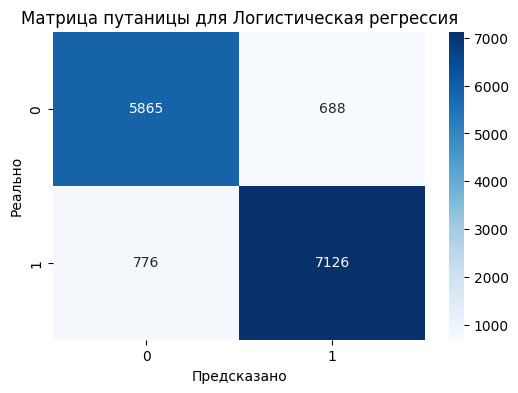

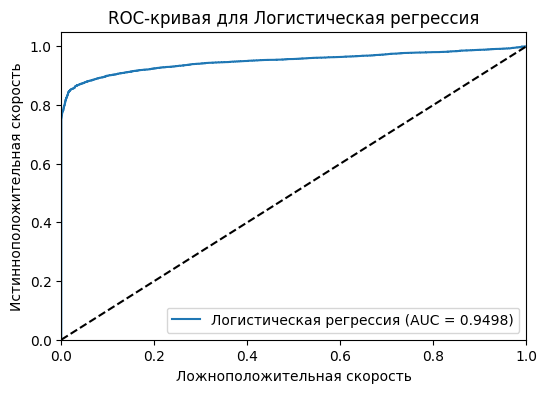

Деревья решений: Точность = 0.9688
Отчет о классификации:
{'0': {'precision': 0.9643835616438357, 'recall': 0.9668853960018312, 'f1-score': 0.9656328583403185, 'support': 6553.0}, '1': {'precision': 0.9724793912492073, 'recall': 0.9703872437357631, 'f1-score': 0.9714321910432634, 'support': 7902.0}, 'accuracy': 0.9687997232791422, 'macro avg': {'precision': 0.9684314764465215, 'recall': 0.9686363198687972, 'f1-score': 0.968532524691791, 'support': 14455.0}, 'weighted avg': {'precision': 0.9688092444900236, 'recall': 0.9687997232791422, 'f1-score': 0.9688031334713231, 'support': 14455.0}}


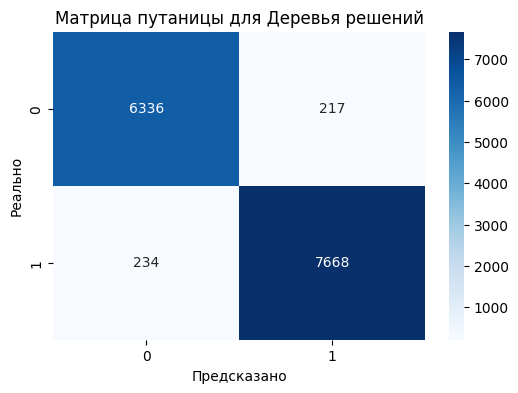

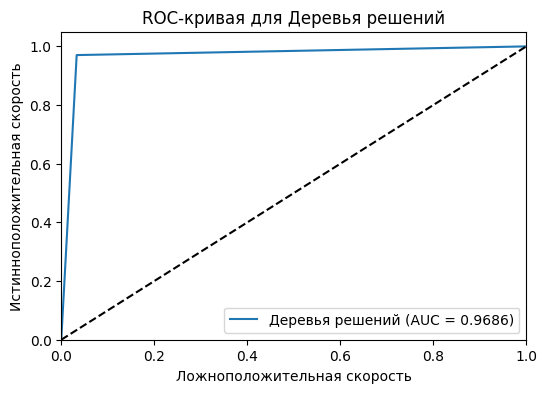

Случайный лес: Точность = 0.9689
Отчет о классификации:
{'0': {'precision': 0.9680981595092024, 'recall': 0.9632229513200061, 'f1-score': 0.9656544022030138, 'support': 6553.0}, '1': {'precision': 0.9696282293635791, 'recall': 0.973677549987345, 'f1-score': 0.9716486708341227, 'support': 7902.0}, 'accuracy': 0.9689380837080594, 'macro avg': {'precision': 0.9688631944363908, 'recall': 0.9684502506536756, 'f1-score': 0.9686515365185682, 'support': 14455.0}, 'weighted avg': {'precision': 0.9689345906395576, 'recall': 0.9689380837080594, 'f1-score': 0.9689312414090341, 'support': 14455.0}}


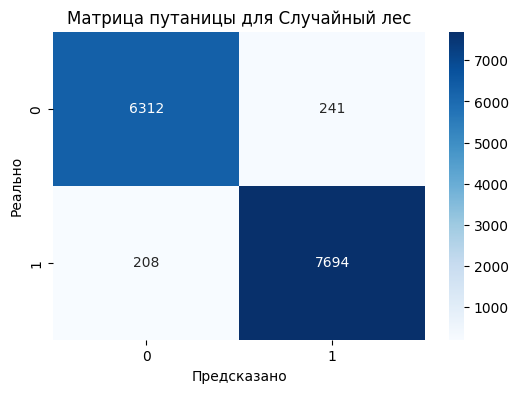

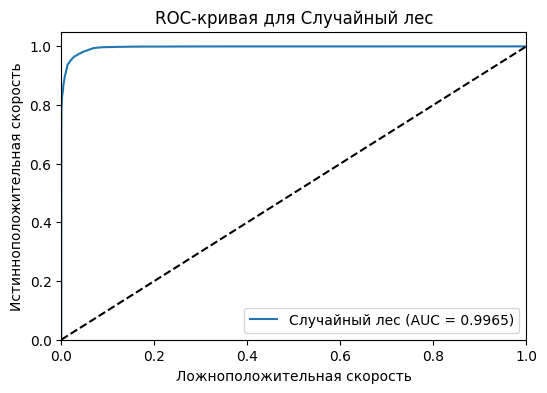

Градиентный бустинг (XGBoost): Точность = 0.9819
Отчет о классификации:
{'0': {'precision': 0.9773899848254932, 'recall': 0.9829085914848161, 'f1-score': 0.9801415202008674, 'support': 6553.0}, '1': {'precision': 0.985759694850604, 'recall': 0.981144014173627, 'f1-score': 0.9834464387645081, 'support': 7902.0}, 'accuracy': 0.9819439640262885, 'macro avg': {'precision': 0.9815748398380486, 'recall': 0.9820263028292215, 'f1-score': 0.9817939794826878, 'support': 14455.0}, 'weighted avg': {'precision': 0.9819653877046648, 'recall': 0.9819439640262885, 'f1-score': 0.9819481937733261, 'support': 14455.0}}


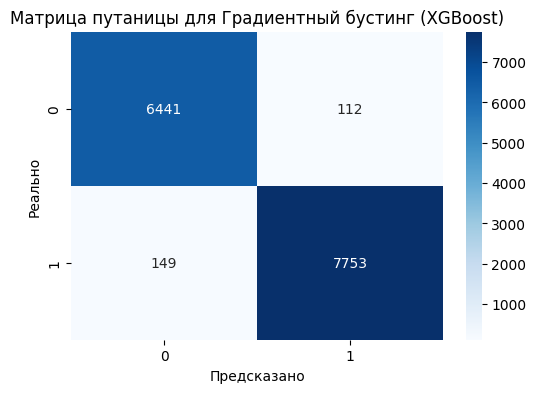

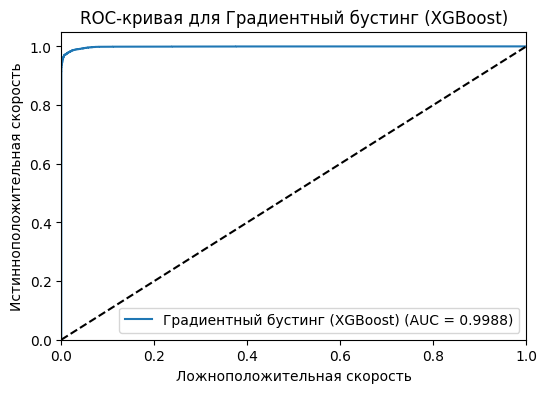

Поддерживающие векторные машины (SVM): Точность = 0.9257
Отчет о классификации:
{'0': {'precision': 0.9195895236636544, 'recall': 0.9162215779032504, 'f1-score': 0.9179024613973399, 'support': 6553.0}, '1': {'precision': 0.9307342922028766, 'recall': 0.9335611237661352, 'f1-score': 0.9321455648218347, 'support': 7902.0}, 'accuracy': 0.925700449671394, 'macro avg': {'precision': 0.9251619079332656, 'recall': 0.9248913508346928, 'f1-score': 0.9250240131095873, 'support': 14455.0}, 'weighted avg': {'precision': 0.9256819457319307, 'recall': 0.925700449671394, 'f1-score': 0.9256886255800004, 'support': 14455.0}}


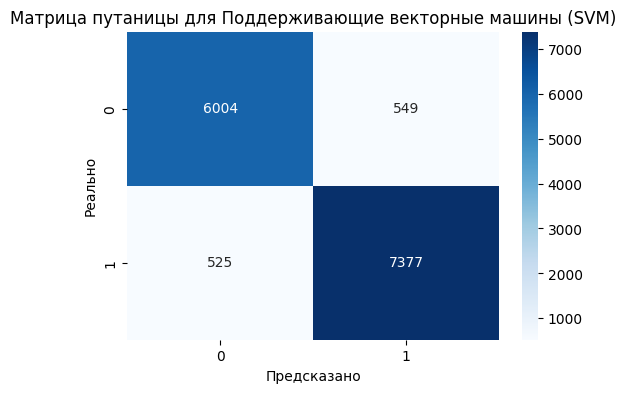

Нейронные сети: Точность = 0.9801
Отчет о классификации:
{'0': {'precision': 0.9759914906549156, 'recall': 0.9801617579734473, 'f1-score': 0.9780721790772042, 'support': 6553.0}, '1': {'precision': 0.983489966979934, 'recall': 0.9800050620096178, 'f1-score': 0.9817444219066938, 'support': 7902.0}, 'accuracy': 0.9800760982359046, 'macro avg': {'precision': 0.9797407288174248, 'recall': 0.9800834099915325, 'f1-score': 0.979908300491949, 'support': 14455.0}, 'weighted avg': {'precision': 0.9800906231295122, 'recall': 0.9800760982359046, 'f1-score': 0.9800796548875554, 'support': 14455.0}}


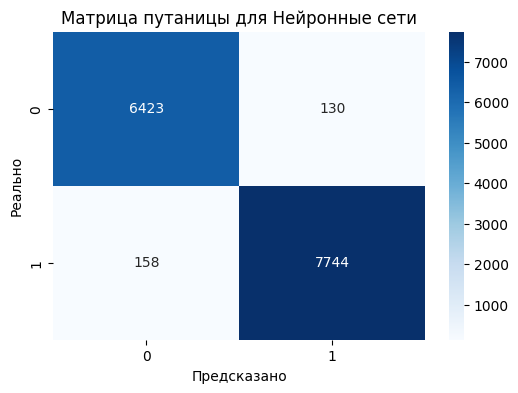

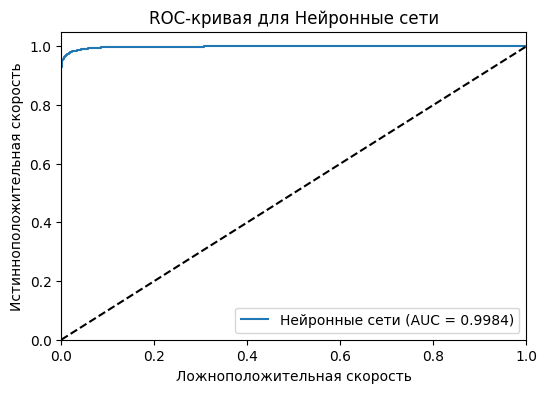

k-Ближайших соседей (k-NN): Точность = 0.9216
Отчет о классификации:
{'0': {'precision': 0.8943538998835856, 'recall': 0.9378910422707157, 'f1-score': 0.9156052141527001, 'support': 6553.0}, '1': {'precision': 0.9463273110905974, 'recall': 0.9081245254365984, 'f1-score': 0.9268324184694866, 'support': 7902.0}, 'accuracy': 0.9216188170183327, 'macro avg': {'precision': 0.9203406054870915, 'recall': 0.923007783853657, 'f1-score': 0.9212188163110934, 'support': 14455.0}, 'weighted avg': {'precision': 0.9227657916413031, 'recall': 0.9216188170183327, 'f1-score': 0.9217427007325165, 'support': 14455.0}}


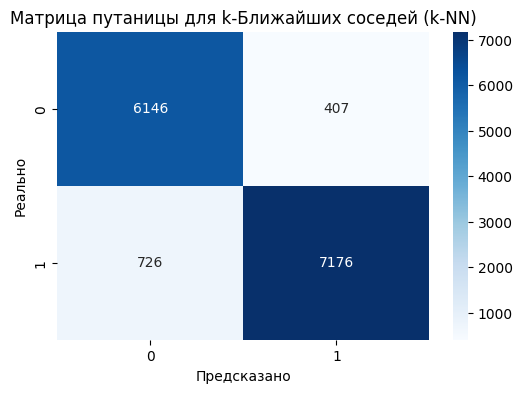

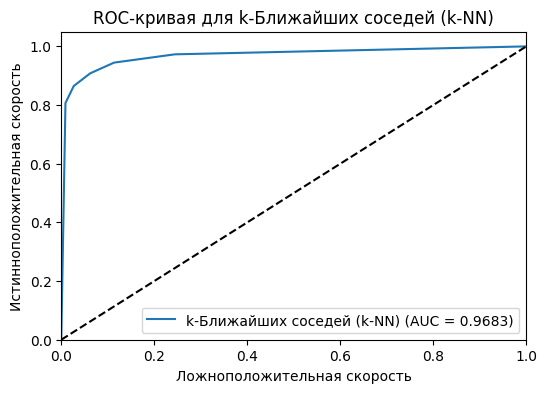

Наивный байесовский классификатор: Точность = 0.8566
Отчет о классификации:
{'0': {'precision': 0.7983484283431007, 'recall': 0.9146955592858232, 'f1-score': 0.8525709409003627, 'support': 6553.0}, '1': {'precision': 0.9195336116309198, 'recall': 0.8084029359655783, 'f1-score': 0.8603946393696545, 'support': 7902.0}, 'accuracy': 0.8565894154271878, 'macro avg': {'precision': 0.8589410199870102, 'recall': 0.8615492476257007, 'f1-score': 0.8564827901350086, 'support': 14455.0}, 'weighted avg': {'precision': 0.864595769632644, 'recall': 0.8565894154271878, 'f1-score': 0.8568478599805663, 'support': 14455.0}}


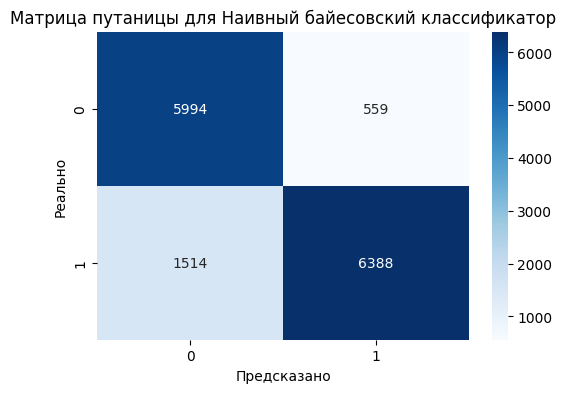

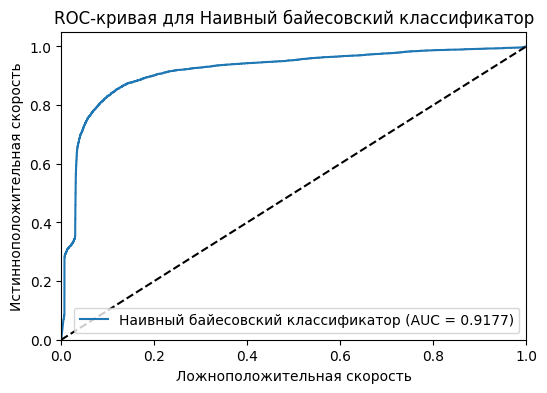

Логистическая регрессия (L2-регуляризация): Точность = 0.8987
Отчет о классификации:
{'0': {'precision': 0.8831501279927721, 'recall': 0.8950099191210132, 'f1-score': 0.8890404729422465, 'support': 6553.0}, '1': {'precision': 0.9119529050422319, 'recall': 0.9017970134143255, 'f1-score': 0.9068465258335454, 'support': 7902.0}, 'accuracy': 0.8987201660325147, 'macro avg': {'precision': 0.8975515165175021, 'recall': 0.8984034662676694, 'f1-score': 0.897943499387896, 'support': 14455.0}, 'weighted avg': {'precision': 0.8988955132743239, 'recall': 0.8987201660325147, 'f1-score': 0.8987743664010528, 'support': 14455.0}}


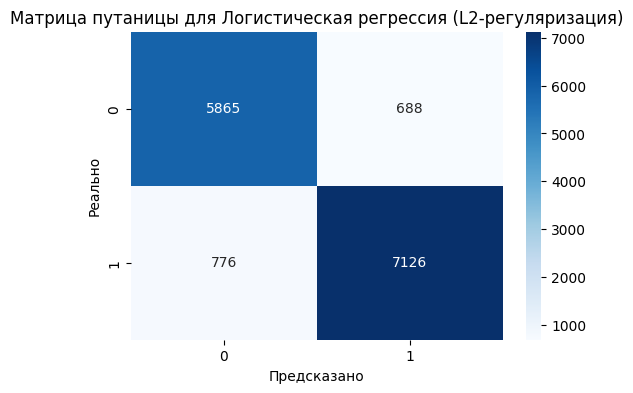

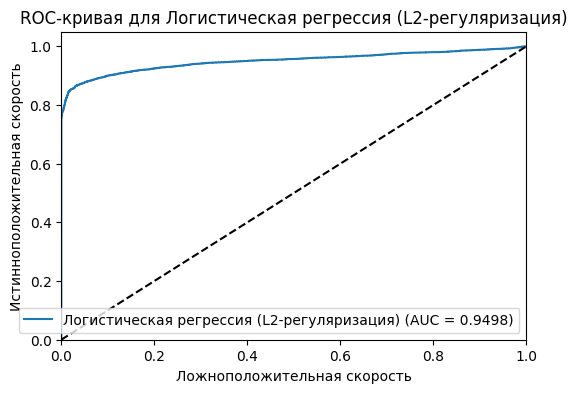

452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Глубокие нейронные сети: Точность = 0.8834
Отчет о классификации:
{'0': {'precision': 0.795460063122117, 'recall': 1.0, 'f1-score': 0.8860793725914408, 'support': 6553.0}, '1': {'precision': 1.0, 'recall': 0.7867628448494052, 'f1-score': 0.8806572703449252, 'support': 7902.0}, 'accuracy': 0.8834313386371497, 'macro avg': {'precision': 0.8977300315610586, 'recall': 0.8933814224247025, 'f1-score': 0.883368321468183, 'support': 14455.0}, 'weighted avg': {'precision': 0.9072742852742465, 'recall': 0.8834313386371497, 'f1-score': 0.8831153150368254, 'support': 14455.0}}


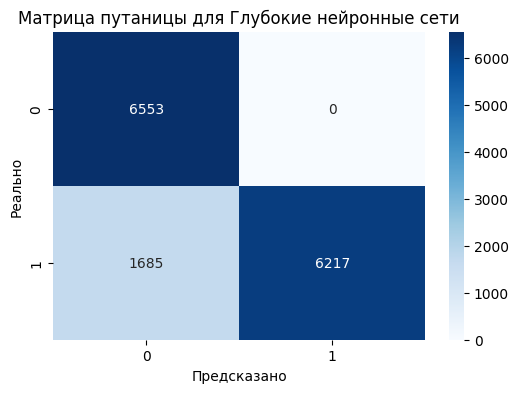

                                            Accuracy  Precision (0)  \
Model                                                                 
Логистическая регрессия                     0.898720       0.883150   
Деревья решений                             0.968800       0.964384   
Случайный лес                               0.968938       0.968098   
Градиентный бустинг (XGBoost)               0.981944       0.977390   
Поддерживающие векторные машины (SVM)       0.925700       0.919590   
Нейронные сети                              0.980076       0.975991   
k-Ближайших соседей (k-NN)                  0.921619       0.894354   
Наивный байесовский классификатор           0.856589       0.798348   
Логистическая регрессия (L2-регуляризация)  0.898720       0.883150   
Глубокие нейронные сети                     0.883431       0.795460   

                                            Recall (0)  F1-score (0)  \
Model                                                                  
Лог

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

def evaluate_models(models, X_test, y_test):
    results = {}

    for model_name, model in models.items():
        # Получаем предсказания
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1
            y_pred = (y_pred_proba >= 0.5).astype(int)  # Бинарные метки
        else:
            y_pred = model.predict(X_test)

        # Убедимся, что y_pred и y_test имеют один и тот же тип
        y_pred = np.array(y_pred).astype(int)
        y_test = np.array(y_test).astype(int)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Сохранение результатов
        results[model_name] = {
            'Accuracy': accuracy,
            'Precision (0)': report['0']['precision'],
            'Recall (0)': report['0']['recall'],
            'F1-score (0)': report['0']['f1-score'],
            'Precision (1)': report['1']['precision'],
            'Recall (1)': report['1']['recall'],
            'F1-score (1)': report['1']['f1-score'],
            'AUC': roc_auc_score(y_test, y_pred_proba) if hasattr(model, "predict_proba") else np.nan
        }

        # Вывод точности
        print(f'{model_name}: Точность = {accuracy:.4f}')
        print('Отчет о классификации:')
        print(report)

        # Построение матрицы путаницы
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                    xticklabels=['0', '1'], yticklabels=['0', '1'])
        plt.title(f'Матрица путаницы для {model_name}')
        plt.xlabel('Предсказано')
        plt.ylabel('Реально')
        plt.show()

        # Построение графика ROC
        if hasattr(model, "predict_proba"):
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = roc_auc_score(y_test, y_pred_proba)

            plt.figure(figsize=(6, 4))
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')
            plt.plot([0, 1], [0, 1], 'k--')  # Линия случайного предсказания
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('Ложноположительная скорость')
            plt.ylabel('Истинноположительная скорость')
            plt.title(f'ROC-кривая для {model_name}')
            plt.legend(loc='lower right')
            plt.show()

    # Создание DataFrame из результатов
    results_df = pd.DataFrame(results).T
    results_df.index.name = 'Model'

    return results_df

# Оценка и сравнение моделей
results_df = evaluate_models(models, X_test, y_test)

# Вывод таблицы с результатами
print(results_df)


На основе предоставленных метрик различных моделей классификации можно сделать следующие выводы:
- Общая производительность моделей:
  - Лучшие модели: Градиентный бустинг (XGBoost) и нейронные сети показывают наилучшие результаты по всем метрикам, включая точность (Accuracy), F1-score и AUC. Это указывает на их высокую эффективность в решении данной задачи.
  - Наихудшие модели: Наивный байесовский классификатор и глубокие нейронные сети имеют более низкие значения точности и других метрик, что свидетельствует о том, что они менее эффективны в данной задаче.
- Точность (Accuracy):
  - Градиентный бустинг (XGBoost) имеет наивысшую точность (0.981944), что говорит о его способности правильно классифицировать большую часть данных.
  - Логистическая регрессия и наивный байесовский классификатор имеют более низкие значения точности (0.898720 и 0.856589 соответственно), что говорит о необходимости их улучшения или настройки.
- Precision, Recall и F1-score:
  - Модели, такие как XGBoost и нейронные сети, демонстрируют высокие значения precision и recall для обоих классов (0 и 1), что говорит о их способности не только правильно идентифицировать положительные случаи, но и минимизировать количество ложноположительных результатов.
  - Наивный байесовский классификатор показывает наименьшие значения precision и F1-score для класса 0, что может указывать на его плохую способность к распознаванию этого класса.

Градиентный бустинг (XGBoost) и нейронные сети являются наиболее эффективными моделями для данной задачи, показывая высокую точность и хорошие значения всех метрик.

# Настройки гиперпараметров

Поскольку Нейронные сети и Градиентный бустинг (XGBoost) демонстрируют хорошие результаты, можно рассмотреть возможность их дальнейшей настройки гиперпараметров для улучшения производительности. Будем использовать методы GridSearchCV и RandomizedSearchCV, чтобы найти лучшие значения гиперпараметров для каждой из этих моделей.

In [51]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#   Настройка гиперпараметров для метода нейронных сетей



In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Input

def create_model(activation='relu', n_units=32, dropout=0.0):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Добавляем Input
    model.add(Dense(n_units, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Создаем функцию для обучения и оценки модели
def model_fn(activation='relu', n_units=32, dropout=0.0):
    model = create_model(activation, n_units, dropout)
    model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)
    predictions = (model.predict(X_test) > 0.5).astype("int32")  # Прогнозирование на валидационной выборке
    return f1_score(y_test, predictions)  # Возвращаем F1-score

# Параметры для GridSearch
param_grid = {
    'activation': ['relu', 'tanh'],
    'n_units': [32, 64, 128],
    'dropout': [0.0, 0.2, 0.5]
}

# Инициализация переменных для поиска по сетке
best_score = 0
best_params = {}

# Перебор параметров
for activation in param_grid['activation']:
    for n_units in param_grid['n_units']:
        for dropout in param_grid['dropout']:
            score = model_fn(activation, n_units, dropout)
            if score > best_score:
                best_score = score
                best_params = {'activation': activation, 'n_units': n_units, 'dropout': dropout}

print("Лучшие параметры:", best_params)


452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
Лучшие параметры: {'activation': 'relu', 'n_units': 128, 'dropout': 0.0}


Лучшие гиперпараметры: В результате поиска лучшими параметрами для данной задачи оказались: Функция активации: relu
Количество нейронов в слое: 128
Dropout: 0.0 (т.е. Dropout не используется). Это значит, что модель с этими параметрами дала наивысший F1-score среди всех комбинаций. Для данной задачи Dropout оказался не полезным, и использование большего количества нейронов (128) с активацией relu улучшает производительность модели.

In [61]:
best_model_nn = create_model(**best_params)
best_model_nn.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)

# Предсказания на валидационной выборке
y_test_pred_nn = (best_model_nn.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import f1_score, accuracy_score

# Оценка F1-меры
f1 = f1_score(y_test, y_test_pred_nn)
print("F1-Score:", f1)

# Оценка точности
accuracy = accuracy_score(y_test, y_test_pred_nn)
print("Accuracy:", accuracy)


452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
F1-Score: 0.9694160066962848
Accuracy: 0.9671393981321342


- F1-Score: 0.9694 — модель хорошо справляется с задачей классификации, сбалансировано учитывая как точность (precision), так и полноту (recall). Высокое значение F1-Score указывает на то, что модель минимизирует как ложные срабатывания (false positives), так и пропуски (false negatives).
- Точность (Accuracy): 0.9671 — это означает, что около 96.7% всех предсказаний модели верны. Высокая точность указывает на малое количество ошибок на тестовых данных.

# Настройка гиперпараметров для XGBoost

In [58]:
# GridSearchCV
# Определение модели
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Определение параметров для поиска
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры для XGBoost:", grid_search_xgb.best_params_)
print("Лучшая точность для XGBoost:", grid_search_xgb.best_score_)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:13:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Лучшие параметры для XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Лучшая точность для XGBoost: 0.9839326139959118


- Лучшие параметры: после применения GridSearchCV, модель XGBoost показала, что наилучшая комбинация гиперпараметров для данной задачи выглядит следующим образом:
  - colsample_bytree = 1.0 — модель использует все признаки для построения каждого дерева,
  - learning_rate: 0.2 (скорость обучения),
  - max_depth: 7 (максимальная глубина деревьев),
  - n_estimators: 200 (количество деревьев),
  - subsample: 0.8 модель использует 80% данных для обучения каждого дерева, что помогает избежать переобучения.
- Точность модели: Лучшая достигнутая точность с этими параметрами на кросс-валидации составляет 98.39%. Это очень высокий результат, который показывает, что модель XGBoost хорошо обучается на данном наборе данных.

Таким образом, можно сделать вывод, что настройки гиперпараметров, полученные через GridSearchCV, существенно улучшают производительность модели, достигая высокой точности на данных.

In [65]:
# Предсказания на валидационной выборке
y_test_pred_xgb = (grid_search_xgb.predict(X_test) > 0.5).astype("int32")

In [67]:
# Сравнение моделей
metrics = {
    'Neural Network': {
        'Accuracy': accuracy_score(y_test, y_test_pred_nn),
        'F1 Score': f1_score(y_test, y_test_pred_nn),
        'ROC AUC': roc_auc_score(y_test, y_test_pred_nn)
    },
    'XGBoost': {
        'Accuracy': accuracy_score(y_test, y_test_pred_xgb),
        'F1 Score': f1_score(y_test, y_test_pred_xgb),
        'ROC AUC': roc_auc_score(y_test,  y_test_pred_xgb)
    }
}

# Вывод результатов
for model, scores in metrics.items():
    print(f"\n{model} Performance:")
    for metric, score in scores.items():
        print(f"{metric}: {score:.4f}")


Neural Network Performance:
Accuracy: 0.9671
F1 Score: 0.9694
ROC AUC: 0.9686

XGBoost Performance:
Accuracy: 0.9846
F1 Score: 0.9859
ROC AUC: 0.9847


- XGBoost показывает более высокие результаты по всем метрикам (точность, F1 и ROC AUC), чем нейронная сеть. Это означает, что XGBoost лучше справляется с данной задачей классификации на тестовой выборке.
- Neural Network все равно демонстрирует хорошие результаты с точностью около 97%, но XGBoost превосходит ее по качеству предсказаний, особенно в точности и F1-мере, что указывает на более эффективное улавливание классов и снижение ошибок.

❗Поскольку XGBoost показал себя лучше в данном случае, он является предпочтительной моделью для этой задачи.

# Сохранение модели

In [68]:
import joblib

# Сохранение модели XGBoost
joblib.dump(grid_search_xgb, 'XGBClassifier.pkl')


['XGBClassifier.pkl']

In [70]:
# Загрузка модели
model = joblib.load('XGBClassifier.pkl')

In [71]:
# Предсказания (использование подгруженной модели, X_test - входные данные, y_perd - результат)
y_pred = model.predict(X_test)

y_pred


array([1, 1, 0, ..., 0, 1, 0])

Формат предсказаний: Модель выдает предсказания в виде массива значений 0 и 1. Это типичный результат для бинарной классификации

Модель смогла классифицировать тестовые данные, разделив их на два класса. Для дальнейшего анализа можно сравнить эти предсказания с реальными значениями (y_test), чтобы оценить точность модели и другие метрики, такие как F1-меру, точность (accuracy) и ROC AUC.

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# 3Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Дерево решений: Точность = {accuracy:.4f}')

# 4. Генерация отчета о классификации
print("\nОтчет о классификации:\n", classification_report(y_test, y_pred, target_names=['0', '1']))

# 5. Вывод первых нескольких предсказаний
for i in range(100):
    print(f'Предсказано: {y_pred[i]}, Метка: {y_test.iloc[i]}')

Дерево решений: Точность = 0.9846

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      6553
           1       0.99      0.98      0.99      7902

    accuracy                           0.98     14455
   macro avg       0.98      0.98      0.98     14455
weighted avg       0.98      0.98      0.98     14455

Предсказано: 1, Метка: 1
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1
Предсказано: 1, Метка: 1
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 1, Метка: 1
Предсказано: 0, Метка: 0
Предсказано: 1

- Точность (precision): Для класса 0 точность составила 0.98, а для класса 1 — 0.99. Это значит, что модель очень редко ошибалась, когда предсказывала положительные или отрицательные классы.
- Полнота (recall): Для класса 0 полнота составила 0.99, а для класса 1 — 0.98, что говорит о том, что модель также эффективно находит все примеры каждого класса.
- F1-Score: F1-Score для обоих классов близок к 0.99, что указывает на сбалансированность между точностью и полнотой для обоих классов.

Модель дерева решений работает эффективно и демонстрирует высокие результаты по всем ключевым метрикам, включая точность, полноту и F1-Score.